## ANALYZING THE IMPACT OF LIFESTYLE PATTERNS ON DAILY SCREEN USAGE 

## Explaining the data set and our project idea

The dataset used in this project contains lifestyle and health-related data from 2,111 individuals originating from Mexico, Peru, and Colombia. It includes 17 features that describe participants’ demographic characteristics, eating habits, physical activity, and other behavioral factors. These features were collected through a web-based survey, and approximately 77% of the data is synthetically generated using the SMOTE technique to balance class labels in the original classification task.

here is a link for the data set: https://archive.ics.uci.edu/dataset/544/estimation%2Bof%2Bobesity%2Blevels%2Bbased%2Bon%2Beating%2Bhabits%2Band%2Bphysical%2Bcondition 

The original purpose of the dataset was to support a classification task predicting obesity levels (NObeyesdad), such as Normal Weight, Overweight, and different types of Obesity. However, in our analysis, we shift the focus toward another important lifestyle factor — screen time.

Our target variable is TUE (Time Using Electronic devices), which refers to the number of hours per day an individual spends in front of screens (television, computer, smartphone, etc.). This variable is originally categorical (0–2 hours, 3–5 hours, more than 5 hours). To gain a deeper understanding of screen-time behavior, we approach the problem using two perspectives:

- Classification modeling, where we retain the original categorical labels (0, 1, 2) and train models to predict the correct class of screen-time range.

- Regression modeling, where TUE is numerically encoded (e.g., 0 → 1.0h, 1 → 4.0h, 2 → 5.5h), allowing us to predict approximate screen time as a continuous variable.

By applying both approaches, we aim to compare the performance and interpretability of regression and classification models in explaining screen usage. Our hypothesis is that lifestyle factors such as diet, hydration, physical activity, alcohol consumption, and transportation habits are predictive of screen-time behavior.

The full analysis includes:

- Data preprocessing,

- Exploratory Data Analysis (EDA) to understand variable distributions and relationships,

- Feature extraction and selection,

- Construction of both regression and classification models,

- Evaluation and comparison of the two modeling approaches.

Through this process, we aim to uncover which personal and lifestyle factors are most strongly associated with technology use, and whether screen-time behavior is better captured through discrete classification or continuous regression modeling.

<hr>

## DATA PREPROCESSING


## 1. Setup and reading CSV into a Pandas dataframe

In [479]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [480]:
import pandas as pd
import warnings


import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


plt.style.use("seaborn-v0_8-dark")
warnings.simplefilter(action="ignore")

In [481]:
Data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
type(Data)

pandas.core.frame.DataFrame

## 2. Descriptive Statistics

In [482]:
Data.shape

(2111, 17)

From the shape attribute, we can see that the data has 2111 entries, with 17 columns. <br>

In [483]:
Data.head(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


We can see that there are several categorical features — such as Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, CALC, MTRANS, and NObeyesdad — which need to be encoded before modeling.<br>

In [484]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

We can see that half of the features are type float (numerical), and the other half are type object (categorical) <br>


In [485]:
for column in Data.select_dtypes(include='object').columns:
    print(f"{column}: {Data[column].unique()}")


Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


After checking the unique values of the categorical features, we observed that most of them have a small and fixed number of categories. Features such as Gender,SMOKE, SCC,FAVC,family_history_with_overweight are binary, while others like CALC, CAEC, and MTRANS contain 3–5 distinct values. NObeysdad contains 6 values. Some features (e.g. CAEC, CALC) appear to follow an ordinal order and may be encoded accordingly using label encoding.
The feature encoding will be done further in this section.
<br>

In [486]:
Data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Using the describe() function, we obtained summary statistics for all numerical (float) features in the dataset. These statistics include the mean, standard deviation, minimum and maximum values, as well as the 25th, 50th (median), and 75th percentiles.

Observing these values, we notice that different features are on very different scales — for example, Height ranges roughly between 1.45 and 1.98 meters, while Weight goes up to 173 kg. 

Due to these varying scales, it is important to standardize the numerical features before modeling. 
<br>

Before we continue with standardization, we would like to check if there are any missing values that need to be dropped or filled
<br>

In [487]:
missing_values = Data.apply(lambda x: x.isnull().sum().sum())
print("Number of missing values by country:\n", missing_values)


Number of missing values by country:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


After verifying the dataset, we confirmed that there are no missing values in any of the features. This is ideal, as it allows us to proceed directly with the standardization step without the need for additional data cleaning or imputation.

Before proceeding with standardization, there is one more important preprocessing step that needs to be done — encoding the categorical features. Since machine learning models and scaling algorithms require numerical input, all categorical variables must be transformed into a numeric format.
Depending on the nature of each feature, we will apply either label encoding (for ordinal features) or one-hot encoding (for nominal features). This ensures that encoded values properly reflect the structure of the data and do not introduce unintended relationships.<br>

## 3. Encoding

In [488]:

data_e=Data.copy()
map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
data_e['CAEC'] = data_e['CAEC'].map(map)
data_e['CALC']=data_e['CALC'].map(map)



In [98]:
data_e.head(30)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,1,no,2.0,no,0.0,1.0,0,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,1,yes,3.0,yes,3.0,0.0,1,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,1,no,2.0,no,2.0,1.0,2,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,1,no,2.0,no,2.0,0.0,2,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,1,no,2.0,no,0.0,0.0,1,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,1,no,2.0,no,0.0,0.0,1,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,1,no,2.0,no,1.0,0.0,1,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,1,no,2.0,no,3.0,0.0,1,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,1,no,2.0,no,1.0,1.0,2,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,1,no,2.0,no,1.0,1.0,0,Public_Transportation,Normal_Weight


In [489]:
data_encoded=data_e.copy()

map={
    "no" : 0,
    "yes":1
}
data_encoded['family_history_with_overweight'] = data_encoded['family_history_with_overweight'].map(map)
data_encoded['FAVC']=data_encoded['FAVC'].map(map)
data_encoded['SMOKE']=data_encoded['SMOKE'].map(map)
data_encoded['SCC']=data_encoded['SCC'].map(map)



In [490]:
data_encoded = pd.get_dummies(data_encoded, columns=['Gender', 'MTRANS'], drop_first=False)

bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)


In [491]:
def classify_tue_level(tue):
    if tue <= 0:
        return "Low"
    elif 0 < tue <= 1:
        return "Medium"
    else:
        return "High"

data_encoded["TUE_Level"] = data_encoded["TUE"].apply(classify_tue_level)

tue_order = {"Low": 0, "Medium": 1, "High": 2}
data_encoded["TUE_Target"] = data_encoded["TUE_Level"].map(tue_order)


In [492]:
map={
    "Insufficient_Weight":0,
    "Normal_Weight":1,
    "Overweight_Level_I":2,
    "Overweight_Level_II":3,
    "Obesity_Type_I":4,
    "Obesity_Type_II":5,
    "Obesity_Type_III":6
}
data_encoded['NObeyesdad']=data_encoded['NObeyesdad'].map(map)


In [493]:
data_encoded = data_encoded.drop(["TUE_Level", "TUE"], axis=1)

In [494]:
data_encoded.head(30)

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,CALC,NObeyesdad,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,TUE_Target
0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,...,0,1,1,0,0,0,0,1,0,1
1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,...,1,1,1,0,0,0,0,1,0,0
2,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,...,2,1,0,1,0,0,0,1,0,1
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,...,2,2,0,1,0,0,0,0,1,0
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,...,1,3,0,1,0,0,0,1,0,0
5,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,...,1,1,0,1,1,0,0,0,0,0
6,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,...,1,1,1,0,0,0,1,0,0,0
7,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,...,1,1,0,1,0,0,0,1,0,0
8,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,...,2,1,0,1,0,0,0,1,0,1
9,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,...,0,1,0,1,0,0,0,1,0,1


In [495]:
data_visualization=data_encoded.copy() 

In the encoding phase, we transformed all categorical variables into numerical format using three encoding strategies, based on the semantic type of each feature: ordinal encoding, binary encoding, and one-hot encoding.

- Ordinal Encoding:
    Features with a natural progression or hierarchy were manually encoded using integers to preserve their order:

    - CAEC (frequency of food consumption between meals) and CALC (alcohol consumption) were mapped as:
        no → 0, Sometimes → 1, Frequently → 2, Always → 3

    - NObeyesdad (obesity level) was encoded from 0 to 6, corresponding to:
        Insufficient_Weight → Obesity_Type_III

- Binary Encoding (0/1):
    Features with yes/no responses were encoded as 0 = no, 1 = yes. This was applied to:

    - FAVC, SMOKE, SCC, and family_history_with_overweight

- One-Hot Encoding:
    For nominal variables that have no inherent order between categories, we applied one-hot encoding using pd.get_dummies():

    - Gender was encoded into a binary column Gender_Male (1 = Male, 0 = Female)

    - MTRANS (transportation method) was expanded into multiple binary columns (e.g., MTRANS_Bike, MTRANS_Walking, etc.), each indicating the presence of a specific category

After one-hot encoding, the resulting boolean columns were converted to integer format (1/0) for compatibility with machine learning algorithms. This structured encoding strategy ensures that each variable is represented numerically in a way that reflects its true semantic meaning, preserving order where appropriate and avoiding artificial relationships where none exist.

The target variable TUE (Time Using Technology Devices) is also label encoded. The values represent ordinal categories of daily screen time:

- 0 → 0–2 hours

- 1 → 3–5 hours

- 2 → More than 5 hours

Since these categories follow a clear and increasing order, this encoding is directly applicable for classification tasks. No additional transformation is required for classification models, provided that the class distribution is balanced. If the distribution is imbalanced, appropriate techniques such as oversampling or undersampling must be applied.

For the purposes of regression analysis, TUE will later be mapped to approximate continuous values (representing the midpoint of each interval) in order to support the development of a regression model.

As a result, the dataset is now fully encoded, numerically consistent, and ready for standardization and model development.

## 4. Feature Engineering

In [496]:
data_features=data_visualization.copy()

data_features['Basal Metabolic Rate'] = (
    data_features['Gender_Female'] * (
        655 + (9.6 * data_features['Weight']) +
        (1.8 * data_features['Height']) -
        (4.7 * data_features['Age'])
    ) +
    data_features['Gender_Male'] * (
        66 + (13.7 * data_features['Weight']) +
        (5 * data_features['Height']) -
        (6.8 * data_features['Age'])
    )
)

data_features["BMI"] = data_features["Weight"] / (data_features["Height"] **2) 



In [497]:
data_features.head(20)

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,TUE_Target,Basal Metabolic Rate,BMI
0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,...,1,0,0,0,0,1,0,1,1173.616,24.386526
1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,...,1,0,0,0,0,1,0,0,1096.636,24.238227
2,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,...,0,1,0,0,0,1,0,1,973.500,23.765432
3,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,...,0,1,0,0,0,0,1,0,1083.300,26.851852
4,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,...,0,1,0,0,0,1,0,0,1155.560,28.342381
5,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,...,0,1,1,0,0,0,0,0,603.000,20.195092
6,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,...,1,0,0,0,1,0,0,0,1077.600,24.444444
7,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,...,0,1,0,0,0,1,0,0,650.700,19.705532
8,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,...,0,1,0,0,0,1,0,1,788.500,20.199470
9,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,...,0,1,0,0,0,1,0,1,856.600,22.985398


To enrich the dataset and provide deeper insights into the lifestyle and physiological patterns of the participants, two new features were engineered:

- Basal Metabolic Rate (BMR)
    - The BMR represents the estimated number of calories an individual burns at rest and was calculated using the Harris-Benedict equation. This formula takes into account the person's gender, age, height, and weight. Different formulas were used for male and female participants to account for physiological differences. The inclusion of this feature provides a useful physiological baseline that may help understand individual differences in energy needs and possibly screen time behavior.

- Body Mass Index
    - The Body Mass Index is a well-established indicator that reflects the relationship between an individual’s weight and height. It is calculated using the formula: weight in kilograms divided by the square of height in meters (BMI = weight / height²).
This feature serves as a useful proxy for categorizing individuals into various weight-related health ranges, such as underweight, normal weight, overweight, and obesity. Including BMI allows the model to capture physical condition patterns that may correlate with screen time and lifestyle behaviors.

In [498]:
data_visualization=data_features.copy() #we will use this data for visualization (this data contains the two new added features)

In [499]:
data_visualization.to_csv("data_for_visualization.csv",index=False)

## 5. Standardization

In [500]:
data_scaled=data_visualization.copy()

In [501]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF','Basal Metabolic Rate','BMI']

scaler = StandardScaler()
data_scaled[cols_to_scale] = scaler.fit_transform(data_scaled[cols_to_scale])

data_scaled.describe()


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,TUE_Target,Basal Metabolic Rate,BMI
count,2111.000000,2.111000e+03,2.111000e+03,2111.000000,2111.000000,2.111000e+03,2.111000e+03,2111.000000,2111.000000,2.111000e+03,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2.111000e+03,2111.000000
mean,0.000000,-5.385449e-16,-5.385449e-16,0.817622,0.883941,-1.346362e-17,4.964711e-16,1.140692,0.020843,1.077090e-16,...,0.494079,0.505921,0.216485,0.003316,0.005211,0.748460,0.026528,0.927523,-3.231270e-16,0.000000
std,1.000237,1.000237e+00,1.000237e+00,0.386247,0.320371,1.000237e+00,1.000237e+00,0.468543,0.142893,1.000237e+00,...,0.500083,0.500083,0.411946,0.057502,0.072015,0.434001,0.160737,0.670966,1.000237e+00,1.000237
min,-1.625448,-2.698006e+00,-1.817304e+00,0.000000,0.000000,-2.658379e+00,-2.167023e+00,0.000000,0.000000,-1.644905e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.319305e+00,-2.085224
25%,-0.688066,-7.683883e-01,-8.062914e-01,1.000000,1.000000,-7.850187e-01,-3.456952e-02,1.000000,0.000000,-6.905894e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.870834e-01,-0.671003
50%,-0.241897,-1.263207e-02,-1.369510e-01,1.000000,1.000000,-6.283450e-02,4.041527e-01,1.000000,0.000000,-1.307326e-02,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-7.969188e-02,-0.122489
75%,0.265964,7.159595e-01,7.960531e-01,1.000000,1.000000,1.088342e+00,4.041527e-01,1.000000,0.000000,7.659959e-01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.969845e-01,0.788612
max,5.782584,2.983646e+00,3.300136e+00,1.000000,1.000000,1.088342e+00,1.689740e+00,3.000000,1.000000,1.618759e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.645832e+00,2.635839


In [502]:
data_scaled.to_csv("scaled_encoded_data.csv", index=False) #this data will be used for modeling (it is encoded and standardized)

In order to ensure that all continuous numerical features contribute equally to the model, we standardized the data. This transformation centers the values around a mean of 0 and scales them to have a standard deviation of 1.

The following features were standardized:

- Age

- Height

- Weight

- FCVC

- NCP

- CH2O

- FAF

- Basal Metabolic Rate

- Sedentary_Index

These variables were chosen because they are continuous and have different units or scales. Standardizing them prevents features with large numerical ranges (e.g., Weight) from dominating features with smaller ranges (e.g., FAF) during model training.

Other features that were previously encoded as binary (0 or 1) or as ordinal labels (e.g., CAEC, CALC, MTRANS) were not standardized, as doing so would distort their categorical meaning.
The target variable TUE was also excluded from this step, as it was already numerically encoded in the dataset.

In [503]:
data_model_regression=data_scaled.copy() #we will use this dataset (original distribution on TUE) for regression modeling

<hr>

## EDA

Before diving into the development of predictive models, it is essential to explore the data in order to better understand the underlying patterns and relationships between variables. This stage, known as Exploratory Data Analysis (EDA), provides valuable insights into the distribution, variability, and potential correlations among features — especially in relation to the target variable, TUE (Time Using Electronic devices).

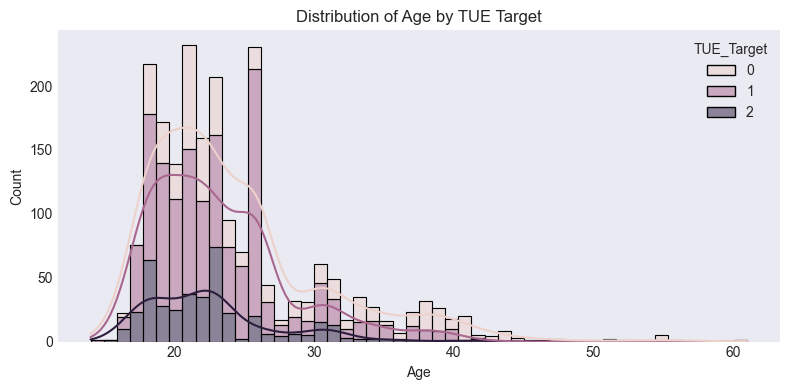

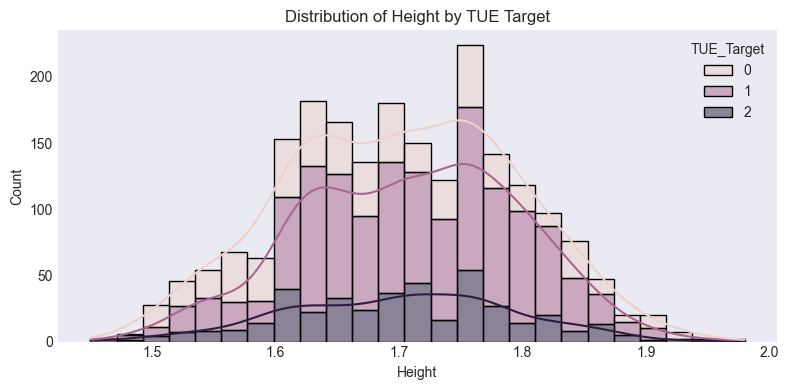

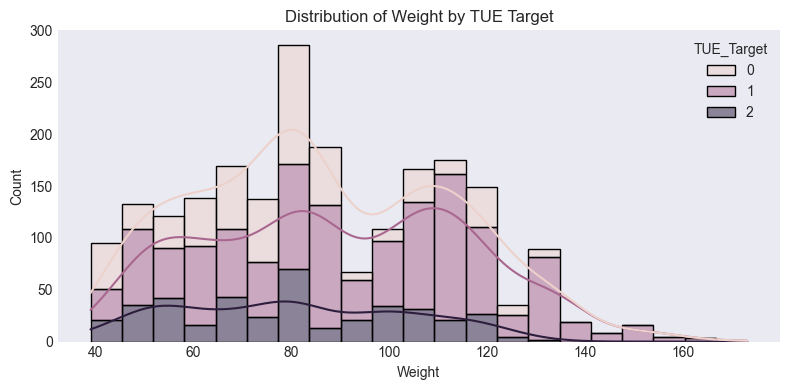

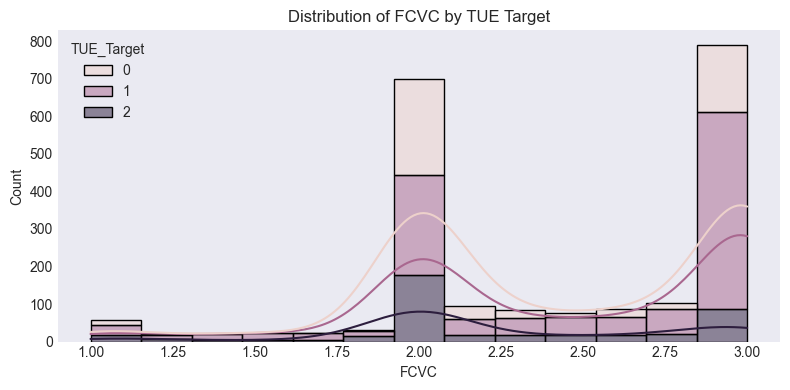

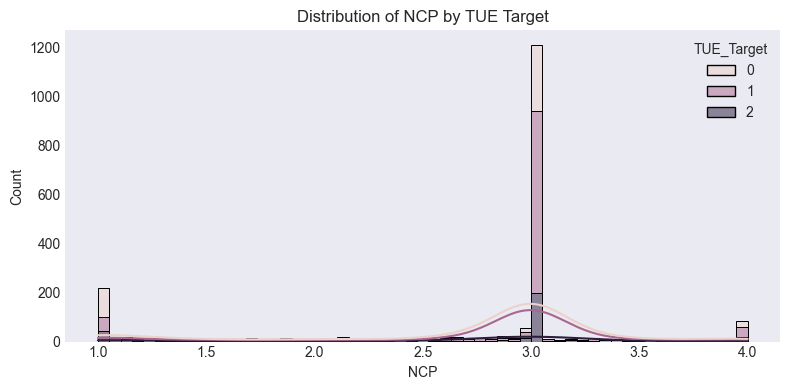

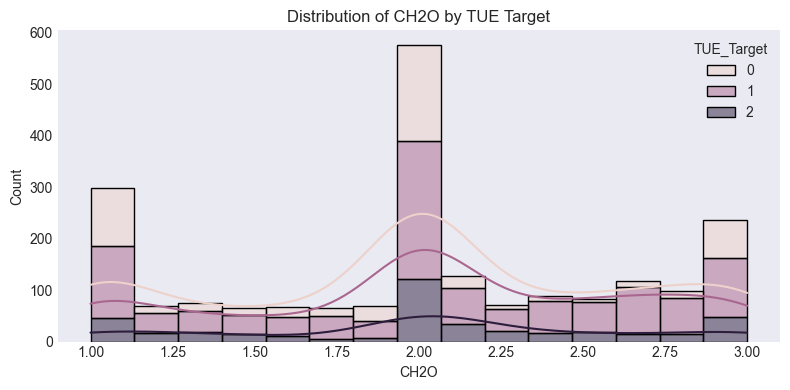

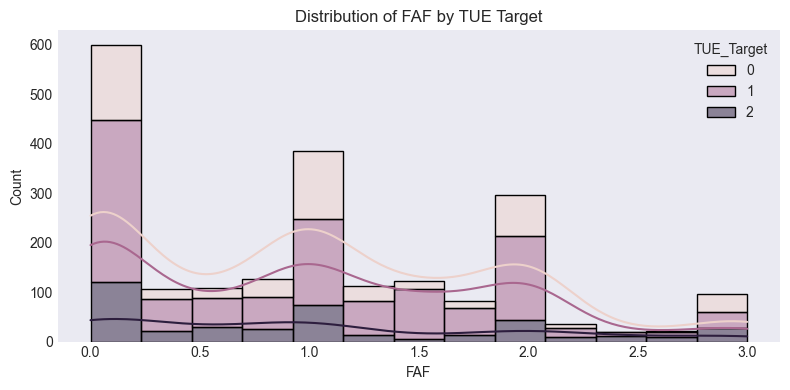

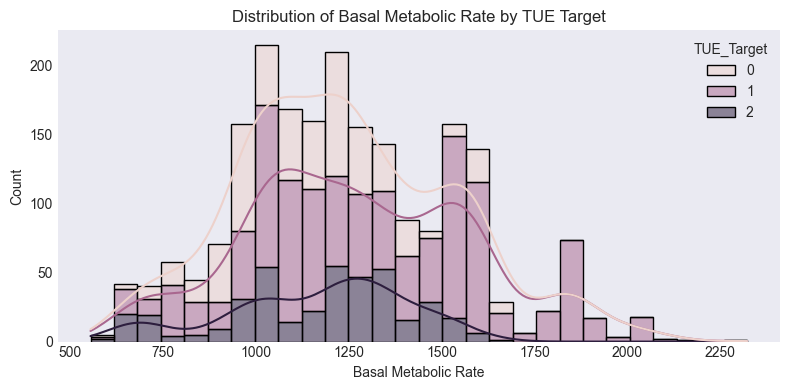

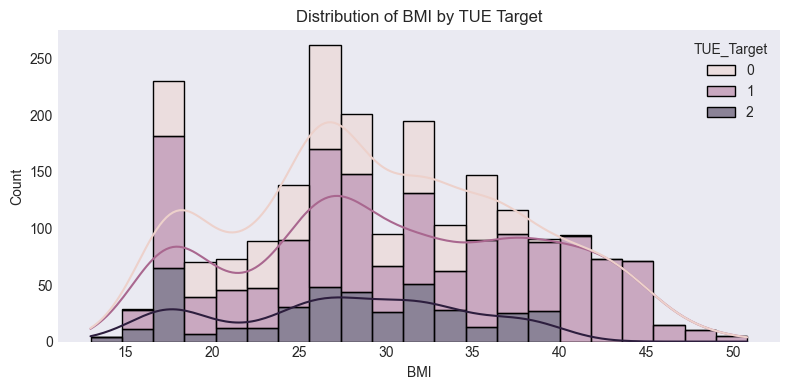

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'Basal Metabolic Rate', 'BMI']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data_visualization, x=feature, hue='TUE_Target', kde=True, multiple='stack')
    plt.title(f'Distribution of {feature} by TUE Target')
    plt.tight_layout()
    plt.show()


- Distribution of Age by TUE Target

    The distribution of age across TUE (Technology Use Exposure) target groups shows that younger individuals (ages 15–25) are more likely to have high screen time (TUE_Target = 2). As age increases, screen time tends to decrease, with older individuals predominantly falling into the low TUE category. This suggests a clear age-related trend in technology usage habits.

- Distribution of Height by TUE Target

    Height does not show a strong discriminative pattern among the TUE groups, although individuals with low to moderate TUE values are more concentrated in the 1.60–1.75m range. The distribution is generally symmetric across the target classes, indicating height may not be a strong predictor of screen time behavior.

- Distribution of Weight by TUE Target

    Weight distributions suggest that individuals with lower TUE levels (TUE_Target = 0) are more concentrated around 70–90 kg, while those with higher TUE values (TUE_Target = 2) are more evenly spread across higher weight intervals. This may imply a potential correlation between higher body weight and increased screen time.

- Distribution of FCVC (Frequency of Vegetable Consumption) by TUE Target

    The majority of individuals fall into either 2 or 3 on the FCVC scale. Interestingly, those with low TUE values are more likely to consume vegetables frequently (value 3), whereas individuals with higher TUE values tend to cluster around the lower end. This pattern hints at a possible link between healthier dietary habits and reduced screen exposure.

- Distribution of NCP (Number of Main Meals per Day) by TUE Target

    Most participants report having 3 main meals a day, with very little variation across TUE groups. A small portion of individuals consuming only 1 meal per day is more prevalent among those with low TUE. However, this feature appears relatively uniform and may have limited predictive power for screen time behavior.

- Distribution of CH2O (Daily Water Consumption) by TUE Target

    Participants with low TUE levels tend to consume more water daily (CH2O = 2 or 3), whereas high TUE individuals are more evenly distributed, including lower levels of water intake. This could indicate a weak inverse relationship between screen time and hydration habits.

- Distribution of FAF (Physical Activity Frequency) by TUE Target

    A clear inverse relationship is observed between physical activity (FAF) and screen time. Individuals with low TUE levels tend to engage in frequent physical activity, while those with high TUE (value 2) are more sedentary, with many reporting zero hours of physical activity per week. This supports the assumption that physical inactivity is linked to increased screen exposure.

- Distribution of Basal Metabolic Rate (BMR) by TUE Target

    The BMR distribution shows that individuals with higher TUE values tend to have slightly higher basal metabolic rates, although overlaps exist. This might reflect body composition differences influenced by lifestyle factors such as physical activity and weight.

- Distribution of BMI by TUE Target

    BMI appears to correlate with TUE levels. Individuals with low screen time are more often within the normal BMI range (18.5–25), whereas higher screen time is associated with increased BMI values, indicating a possible link between sedentary behavior and overweight/obesity.

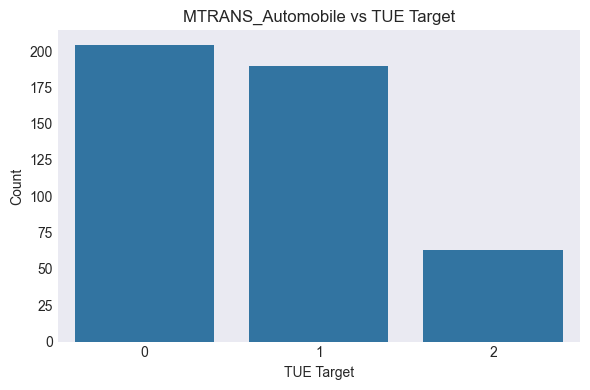

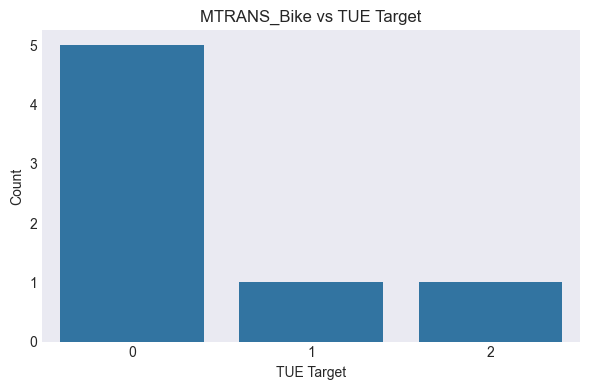

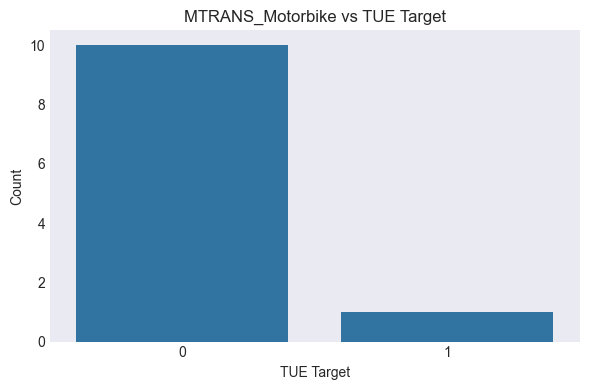

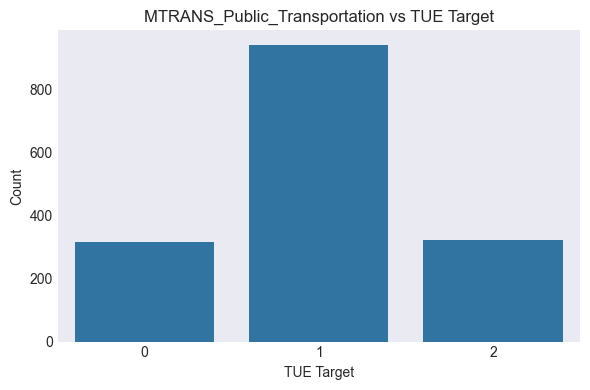

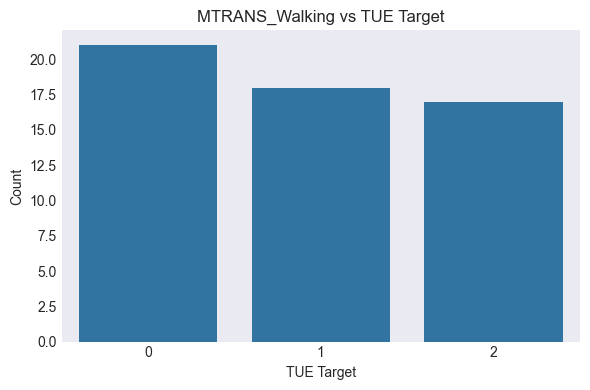

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt

transport_cols = [
    'MTRANS_Automobile',
    'MTRANS_Bike',
    'MTRANS_Motorbike',
    'MTRANS_Public_Transportation',
    'MTRANS_Walking'
]

for col in transport_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data_visualization[data_visualization[col] == 1], x='TUE_Target')
    plt.title(f'{col} vs TUE Target')
    plt.xlabel('TUE Target')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


The transportation method appears to show certain associations with screen time behavior, though the strength of these patterns varies across modes:

- Automobile Users: Individuals who primarily use cars are mostly associated with lower screen time (TUE = 0 and 1), and relatively fewer fall into the high screen-time category. This may suggest that car users, potentially due to active daily routines or employment, spend less time in front of screens.

- Bike Users: This group is small overall, but within it, most individuals belong to the low TUE category. Though sample size is limited, this may indicate that bike users maintain more physically active lifestyles and spend less time on screens.

- Motorbike Users: Similar to bike users, motorbike commuters predominantly fall under the low TUE group, but the sample is extremely limited. No strong conclusions can be drawn due to the low counts.

- Public Transportation Users: This is the most populated category. A significant number of individuals using public transport fall into the moderate screen-time group (TUE = 1). This could reflect a lifestyle with a balance of commuting and screen exposure.

- Walking as Main Transport: Individuals who walk as their primary transportation method show relatively balanced distribution across all three TUE groups. However, they slightly lean toward lower screen time, potentially reflecting an overall healthier and more active lifestyle.

Overall, while some trends can be observed — such as lower screen time among bike and walking commuters — the influence of transportation mode on screen usage is not strictly linear and may be mediated by other lifestyle and contextual factors.

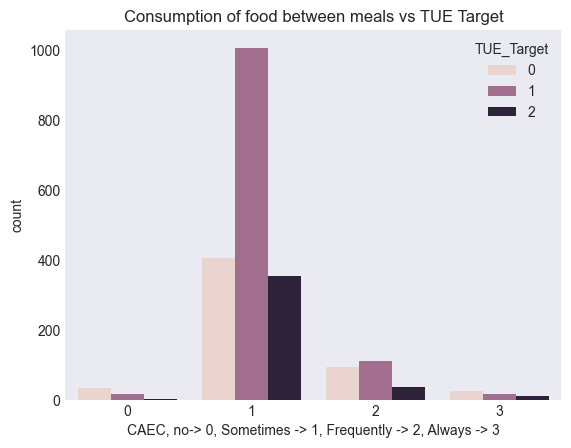

In [507]:
sns.countplot(data=data_visualization, x='CAEC', hue='TUE_Target')
plt.title('Consumption of food between meals vs TUE Target')
plt.xlabel('CAEC, no-> 0, Sometimes -> 1, Frequently -> 2, Always -> 3' )
plt.show()


The feature CAEC (Consumption of food between meals) shows noticeable variation across screen-time groups:

- The majority of individuals, regardless of their TUE category, report "Sometimes" consuming food between meals (CAEC = 1). However, this is especially prominent in the moderate screen-time group (TUE = 1), suggesting a potential association between irregular snacking and screen exposure.

- A higher proportion of frequent snackers (CAEC = 2 or 3) can be seen among individuals with low and moderate screen time, compared to those in the high TUE category.

- Interestingly, those who never snack between meals (CAEC = 0) are mostly found in the low screen-time group, which may indicate more structured or healthier eating routines among individuals who spend less time on screens.

Overall, although "Sometimes" is the dominant behavior across all groups, increased screen time does not seem to directly correlate with frequent snacking. However, structured eating (no snacking) may be more common among individuals with limited screen exposure.

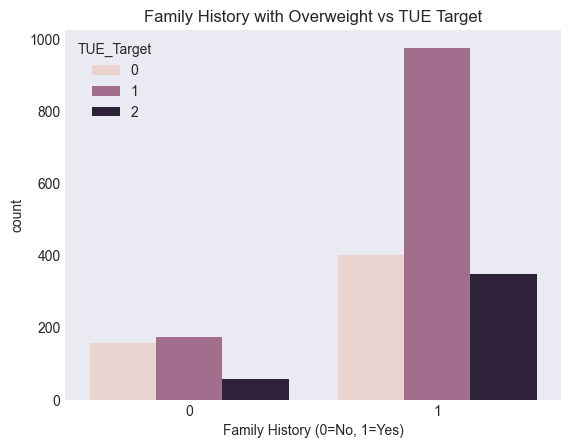

In [508]:
sns.countplot(data=data_visualization, x='family_history_with_overweight', hue='TUE_Target')
plt.title('Family History with Overweight vs TUE Target')
plt.xlabel('Family History (0=No, 1=Yes)')
plt.show()


The relationship between family history of overweight and screen time reveals several interesting trends:

- A significant majority of individuals across all TUE categories report a positive family history of overweight (value = 1). This is most prominent in the moderate TUE group (TUE = 1), followed by the low and high TUE groups.

- While fewer participants report no family history (value = 0), this group still shows a consistent presence in all TUE categories, slightly more represented among those with lower screen time.

- Overall, the data suggests that individuals with a family history of overweight may be more prone to moderate or high screen time behaviors, possibly reflecting shared lifestyle or behavioral patterns within families.

Although this feature alone may not be highly discriminative, it can serve as a relevant context feature when combined with other physiological or behavioral factors in predictive modeling.


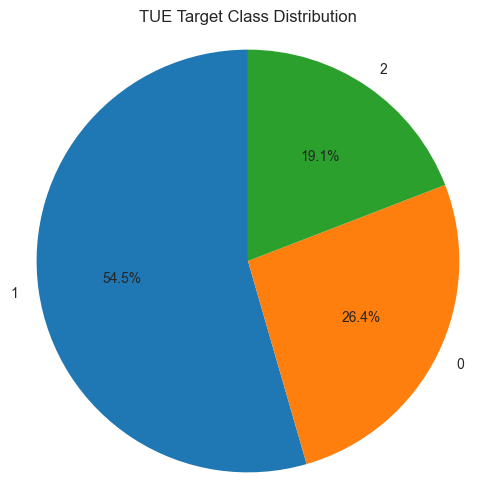

In [509]:
import matplotlib.pyplot as plt

tue_counts = data_visualization['TUE_Target'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(tue_counts, 
        labels=tue_counts.index, 
        autopct='%1.1f%%', 
        startangle=90)
plt.title('TUE Target Class Distribution')
plt.axis('equal') 
plt.show()


The pie chart above illustrates the class distribution of the target variable TUE_Target, which represents daily screen time categorized into three levels:

- 0 → 0–2 hours (Low usage)

- 1 → 3–5 hours (Moderate usage)

- 2 → More than 5 hours (High usage)

As shown, the data is imbalanced, with over half of the participants (54.5%) falling into the moderate usage category (class 1), while the remaining two classes — low (26.4%) and high (19.1%) screen time — are underrepresented.

This class imbalance poses a potential challenge when training classification models, as the model may become biased toward the majority class, resulting in poor generalization for the minority groups. Therefore, in the next section, we apply resampling techniques (SMOTE and random undersampling) to balance the dataset before model training.

It is worth noting that this issue applies only to the classification task, where class frequencies matter. In the regression task, the target variable is treated as a continuous value, and balancing is not required.

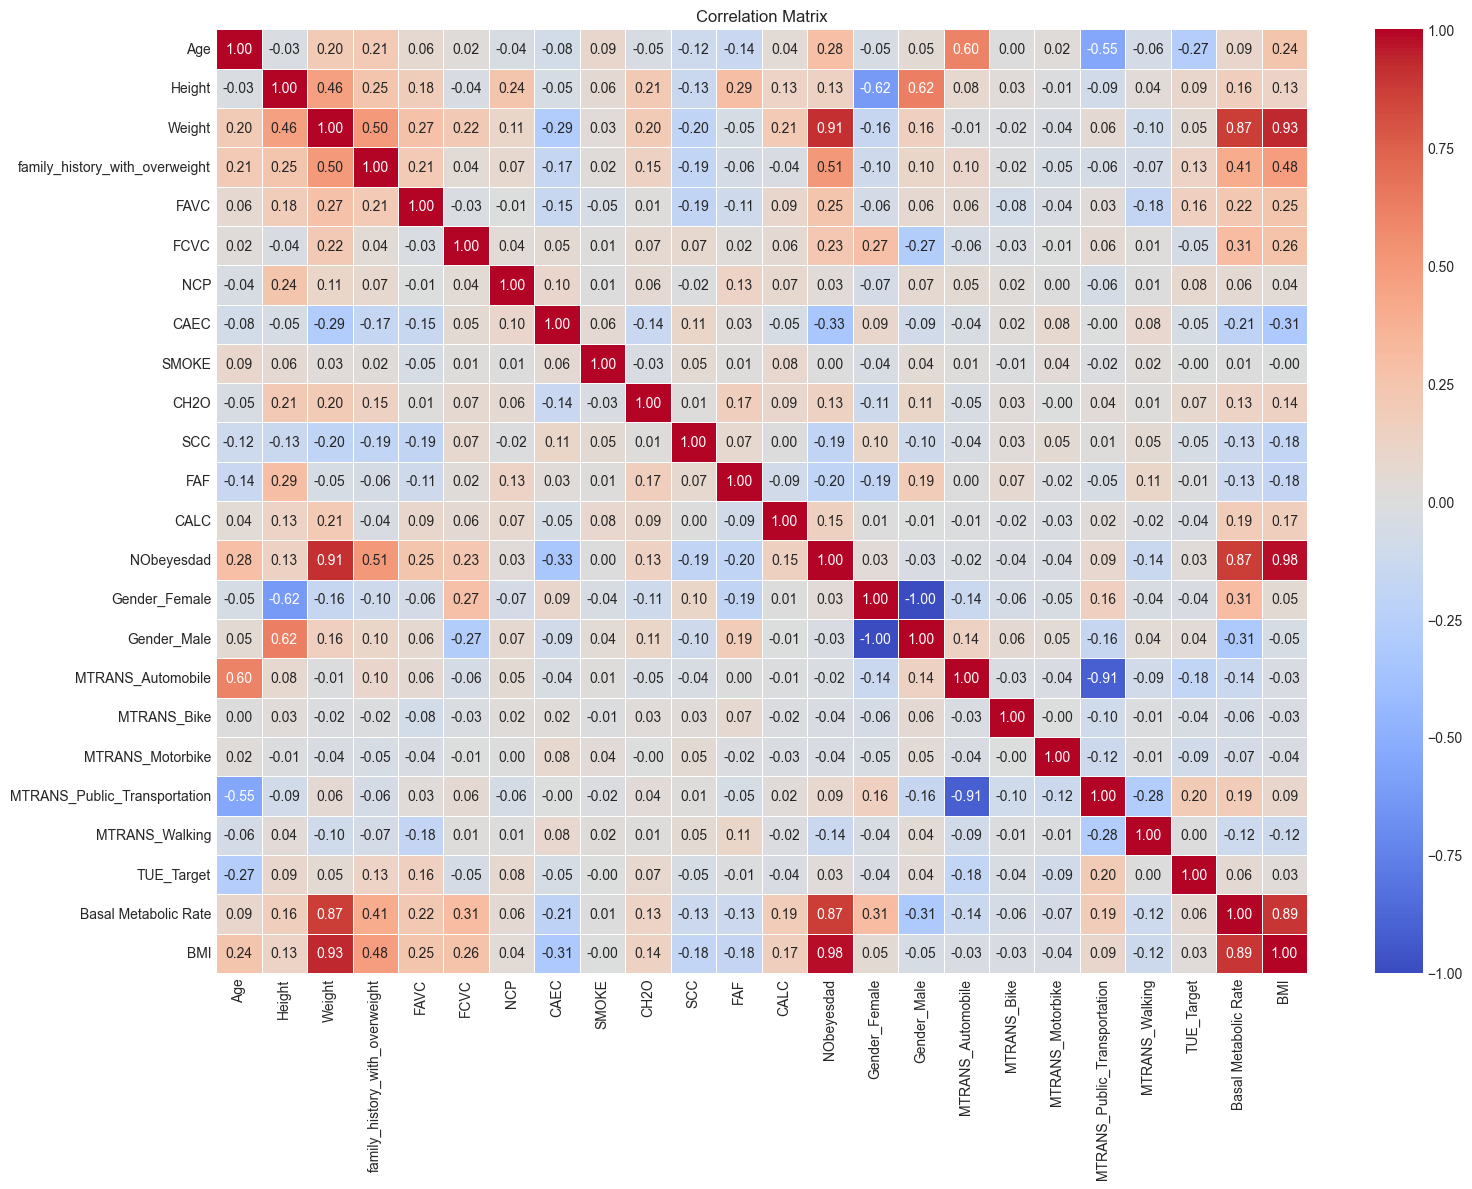

In [510]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data_scaled.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

The correlation matrix displays the linear relationships between all pairs of features in the dataset, including the target variable TUE_Target. The values range from -1 to 1, where:

- Values close to 1 indicate strong positive correlation — both features increase together.

- Values close to -1 indicate strong negative correlation — one feature increases while the other decreases.

- Values near 0 show weak or no linear relationship.

Conclusions:

- As expected, Weight and BMI are very strongly correlated (0.93), since BMI is calculated using weight and height.

- Weight also has a high correlation with Basal Metabolic Rate (BMR) (0.87), meaning individuals with more body mass tend to have higher energy needs.

- The feature NObeyesdad (original obesity label) is also strongly related to Weight and BMI, which confirms its connection to body composition.

Correlation with screen time (TUE_Target):

- TUE_Target shows a moderate negative correlation with Age (-0.27), suggesting that younger individuals tend to spend more time in front of screens.

- Weak positive correlations can be observed with Weight (0.15) and BMI (0.14), indicating a slight tendency for people with higher body mass to also have higher screen time.

- Most lifestyle-related features such as FCVC (vegetable consumption), FAF (physical activity), and CH2O (water intake) show very weak correlations with TUE, but may still carry value based on earlier visual patterns.

This correlation matrix helps us:

- Identify features that are very similar (e.g., Weight and BMI), so we don’t include both in the model.

- Notice which features are worth keeping, even if their correlation with the target is low, especially if visualizations suggest they are meaningful.

Based on the correlation matrix and visual exploration, feature selection will be performed later in the modeling phase to enhance prediction accuracy and reduce noise

<hr>

## Preparing the Dataset for TUE Classification

Before applying any classification techniques, it is important to first examine the distribution of the target variable TUE_Target. This helps identify potential class imbalance, which can significantly affect model performance. Understanding the initial distribution provides insight into whether resampling techniques such as SMOTE or undersampling will be necessary to ensure fair and effective training.

In [511]:
tue_count = data_visualization['TUE_Target'].value_counts().sort_index()
print(tue_count)

TUE_Target
0     557
1    1150
2     404
Name: count, dtype: int64


The output reveals that the target variable TUE_Target is not evenly distributed across its classes. Specifically, class 1 (representing moderate screen time) is significantly overrepresented compared to classes 0 and 2. This class imbalance could lead to biased model performance, where the model favors the majority class. Therefore, it is necessary to apply balancing techniques before training in order to ensure fair representation of all categories and improve the overall predictive quality of the classification model.

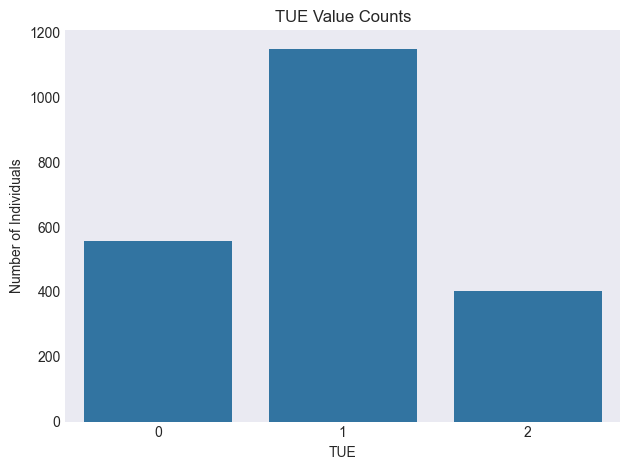

In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=tue_count.index.astype(str), y=tue_count.values)
plt.title("TUE Value Counts")
plt.xlabel("TUE")
plt.ylabel("Number of Individuals")
plt.tight_layout()
plt.show()


To address the imbalance in the TUE_Target variable, we will apply a two-step resampling strategy on the training data:

- Oversampling with SMOTE:
    - Classes 0 and 2, which were underrepresented in the original distribution, were synthetically oversampled to 600 samples each using the SMOTE algorithm. This ensures that these minority classes have sufficient representation in the training process.

- Undersampling the majority class:
    - Class 1, which initially had the highest number of instances, was randomly undersampled to 600 samples to prevent the model from being biased toward this class.

As a result, the training dataset became perfectly balanced, with 600 samples per class, creating a fair foundation for building robust and unbiased classification models.

In [513]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = data_scaled.drop("TUE_Target", axis=1)
y = data_scaled["TUE_Target"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

smote = SMOTE(sampling_strategy={0: 600, 2: 600}, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

undersample = RandomUnderSampler(sampling_strategy={1: 600}, random_state=42)
X_train_balanced, y_train_balanced = undersample.fit_resample(X_train_smote, y_train_smote)

print(Counter(y_train_balanced))


Counter({0: 600, 1: 600, 2: 600})


In [514]:
X_test.shape 


(423, 23)

In [515]:
X_train.shape 


(1266, 23)

In [516]:
y_train.shape 

(1266,)

In [517]:
y_test.shape 

(423,)

In [518]:
X_val.shape 

(422, 23)

In [519]:
y_val.shape 

(422,)

In [520]:
X_train_balanced.shape

(1800, 23)

In [521]:
y_train_balanced.shape

(1800,)

The following chart visualizes the effects of our resampling strategy, highlighting the transition from an imbalanced to a balanced class distribution in the training data.

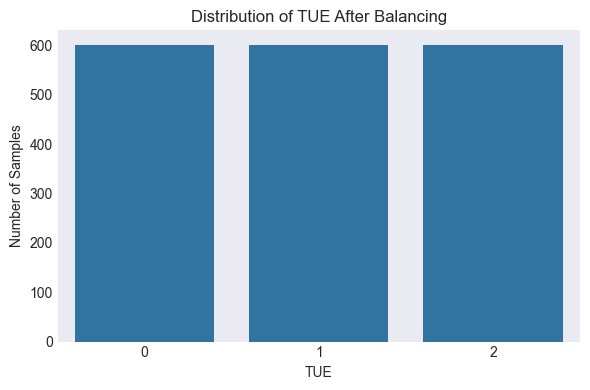

In [522]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

class_counts = pd.Series(Counter(y_train_balanced)).sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values)
plt.title("Distribution of TUE After Balancing")
plt.xlabel("TUE")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


<hr>


## TOP 3 ML MODEL TRAINING - CLASSIFICATION

Training a machine learning model is a central step in the entire analysis process. In this phase, the model learns from the available data to uncover patterns and relationships between the input variables (features) and the target variable.

The goal of training is to build a model that can accurately predict outcomes for new data that may be added to the dataset. The selected model is trained using the training data, and its performance is later evaluated on separate validation and test sets.

In our project, training focuses on building models that can predict how much time an individual spends in front of electronic screens per day, based on various personal and lifestyle habits provided as input features

## 1. SVM - Support Vector Machine

In [523]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_balanced, y_train_balanced)
y_val_pred_svm = svm_model.predict(X_val)

## 2. RF - Random Forest

In [524]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier( n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
y_val_pred_rf = rf_model.predict(X_val)

## 3. Gradient Boosting - XGBoost Classifier

In [525]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\lenovo ip3\appdata\local\programs\python\python313\lib\site-packages (3.0.1)




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [526]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

xgb_model.fit(X_train_balanced, y_train_balanced)
y_val_pred_xgb = xgb_model.predict(X_val)


<hr>

## EVALUATION AND COMPARISON - CLASSIFICATION

## 1. SVM

In [527]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=== SVM Evaluation on Validation Set ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("__________________________")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_svm))
print("__________________________")
print("Classification Report:")
print(classification_report(y_val, y_val_pred_svm))

=== SVM Evaluation on Validation Set ===
Accuracy: 0.6232227488151659
__________________________
Confusion Matrix:
[[ 75  15  21]
 [ 45 127  58]
 [  9  11  61]]
__________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.62       111
           1       0.83      0.55      0.66       230
           2       0.44      0.75      0.55        81

    accuracy                           0.62       422
   macro avg       0.62      0.66      0.61       422
weighted avg       0.69      0.62      0.63       422



## 2. RANDOM FOREST

In [528]:
print("=== RF Evaluation on Validation Set ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("__________________________")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))
print("__________________________")
print("Classification Report:")
print(classification_report(y_val, y_val_pred_rf))

=== RF Evaluation on Validation Set ===
Accuracy: 0.7890995260663507
__________________________
Confusion Matrix:
[[ 84  21   6]
 [ 22 190  18]
 [  6  16  59]]
__________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       111
           1       0.84      0.83      0.83       230
           2       0.71      0.73      0.72        81

    accuracy                           0.79       422
   macro avg       0.77      0.77      0.77       422
weighted avg       0.79      0.79      0.79       422



## 3. XGBoost

In [529]:
print("=== XGBoost Evaluation on Validation Set ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("__________________________")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_xgb))
print("__________________________")
print("Classification Report:")
print(classification_report(y_val, y_val_pred_xgb))

=== XGBoost Evaluation on Validation Set ===
Accuracy: 0.6872037914691943
__________________________
Confusion Matrix:
[[ 84  19   8]
 [ 29 152  49]
 [ 11  16  54]]
__________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.71       111
           1       0.81      0.66      0.73       230
           2       0.49      0.67      0.56        81

    accuracy                           0.69       422
   macro avg       0.66      0.69      0.67       422
weighted avg       0.71      0.69      0.69       422



**Accuracy** – Represents the ratio of correctly classified instances to the total number of instances.It provides a general measure of a model’s overall classification performance across all classes.

* *Higher accuracy values indicate a greater proportion of correct predictions and thus better model performance.*

**F1-Score (Macro Average)** – Denotes the unweighted mean of the F1-scores computed independently for each class. This metric treats all classes equally, regardless of their frequency, and is particularly useful for evaluating performance in imbalanced datasets.

* *Higher macro F1-scores imply that the model maintains balanced precision and recall across all classes.*

**F1-Score (Weighted Average)** – Represents the mean of per-class F1-scores, weighted by the support (i.e., the number of true instances) of each class.
This metric adjusts for class imbalance and offers a more representative view of the model’s effectiveness across the dataset.

* *Higher weighted F1-scores suggest strong and reliable model performance, even when class distributions are skewed.*

**Precision** – Defined as the ratio of true positives to the total predicted positives.It assesses the model’s ability to correctly identify only relevant instances, reflecting its robustness against false positives.

* *Higher precision indicates greater reliability in positive predictions.*

**Recall (Sensitivity)** – Defined as the ratio of true positives to the total actual positives.
It measures the model’s capacity to capture all relevant cases, focusing on minimizing false negatives.

* *Higher recall signifies improved detection of all relevant positive instances within the dataset.*

In [530]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_predictions = {
    'SVM': y_val_pred_svm,
    'Random Forest': y_val_pred_rf,
    'XGBoost': y_val_pred_xgb
}

results = {
    'Model': [],
    'Accuracy': [],
    'F1 Macro Avg': [],
    'F1 Weighted Avg': [],
    'Precision': [],
    'Recall': []
}

for model_name, y_pred in model_predictions.items():
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_val, y_pred))
    results['F1 Macro Avg'].append(f1_score(y_val, y_pred, average='macro'))
    results['F1 Weighted Avg'].append(f1_score(y_val, y_pred, average='weighted'))
    results['Precision'].append(precision_score(y_val, y_pred, average='weighted'))
    results['Recall'].append(recall_score(y_val, y_pred, average='weighted'))

comparison_df = pd.DataFrame(results)
comparison_df

,Model,Accuracy,F1 Macro Avg,F1 Weighted Avg,Precision,Recall
0,SVM,0.623223,0.613407,0.631807,0.688964,0.623223
1,Random Forest,0.789100,0.768128,0.789458,0.789904,0.789100
2,XGBoost,0.687204,0.668803,0.693340,0.714575,0.687204


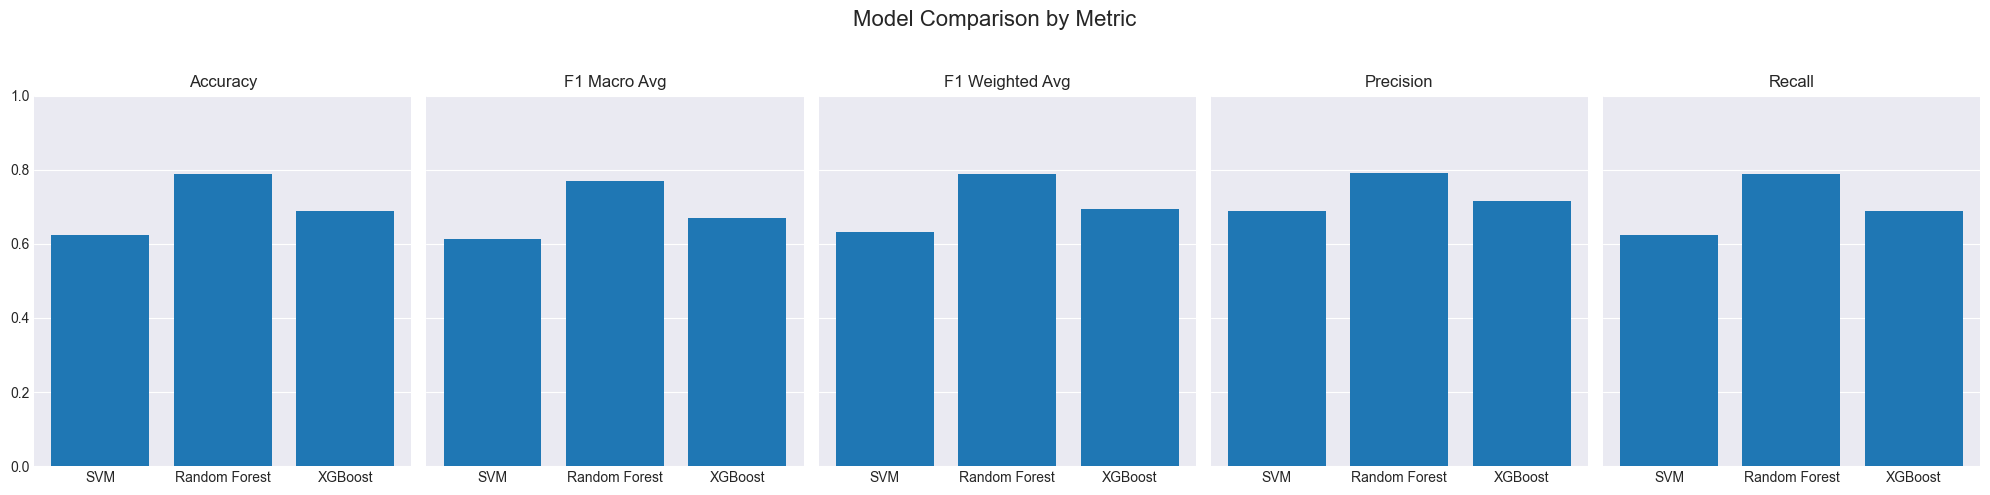

In [531]:

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

metrics = ['Accuracy', 'F1 Macro Avg', 'F1 Weighted Avg', 'Precision', 'Recall']

for i, metric in enumerate(metrics):
    axes[i].bar(comparison_df['Model'], comparison_df[metric])
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)
    axes[i].grid(axis='y')

plt.suptitle('Model Comparison by Metric', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


 *Based on the comparison table and bar plot, the Random Forest model demonstrates the best overall performance across all evaluation metrics. It achieves the highest accuracy along with a strong balance between precision and recall, making it the most suitable candidate for further optimization.*

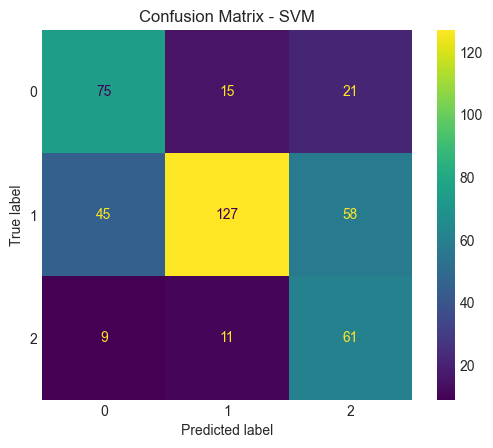

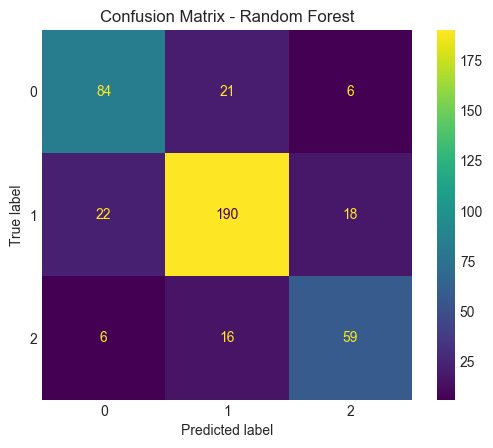

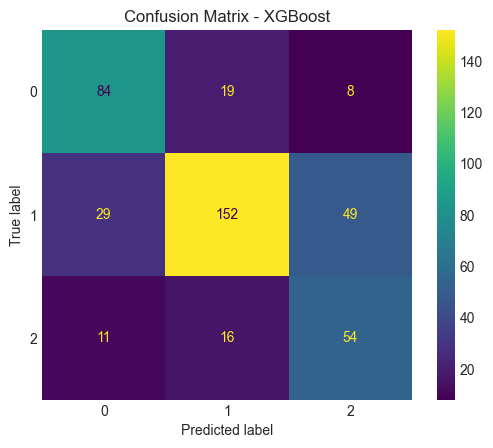

In [532]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_svm)
plt.title("Confusion Matrix - SVM")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred_xgb)
plt.title("Confusion Matrix - XGBoost")
plt.show()



* The presented confusion matrix shows the performance of the SVM model for a three-class classification problem: 0, 1, and 2. Ideally, all values would lie along the diagonal, indicating perfect predictions. In this case, class 1 is the most accurately classified (127 correct predictions), though there is considerable confusion with classes 0 and 2. Class 0 has 75 correct and 36 incorrect predictions, while class 2 is the most consistent with 61 correct classifications and relatively few errors.
This indicates that the model performs well overall, but its performance is not perfect.


* The confusion matrix indicates that the Random Forest model provides stable and accurate classification across the three classes (0, 1, and 2), with a dominant diagonal and minimal inter-class confusion. The highest accuracy is observed for class 1 (190 correct predictions), while classes 0 and 2 show only minor errors. Notably, there is a clear improvement in class 0 compared to the SVM model, highlighting Random Forest’s superior precision and its enhanced ability to distinguish between classes.

* The confusion matrix for the XGBoost model shows solid classification, especially for class 0 (84 correct). Class 1 has the most errors, with significant confusion with class 2 (49 cases). Class 2 shows moderate accuracy. Compared to Random Forest, XGBoost performs slightly worse on class 1 and could benefit from further tuning.

**What to expect:**

When consistency and a low error rate are prioritized, Random Forest stands out as the most reliable choice.

For scenarios where speed or simplicity is crucial, SVM may be a suitable option, though it generally offers lower precision.

With sufficient time and resources for tuning, XGBoost has the potential to deliver superior results; however, in its current configuration, it does not surpass the performance of Random Forest.

<hr>

## FEATURE SELECTION - CLASSIFICATION

Feature selection is a crucial step in the classification process that aims to identify and retain only the most relevant input variables. By reducing the number of features, it helps improve model performance, prevents overfitting, speeds up training time, and enhances interpretability. This process ensures that the model focuses on the most informative data, leading to more accurate and efficient classification results.

## 1. Feature Importance

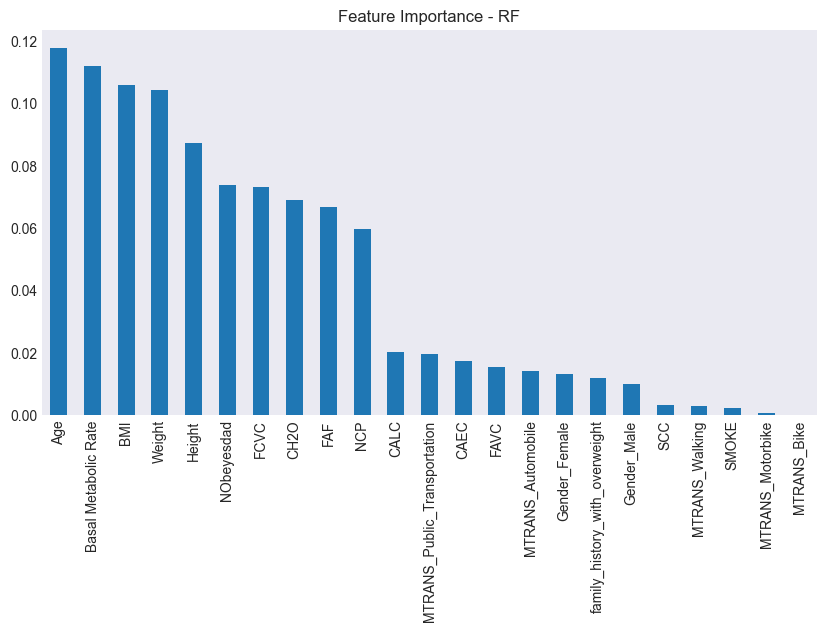

In [533]:
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Feature Importance - RF')
plt.show()

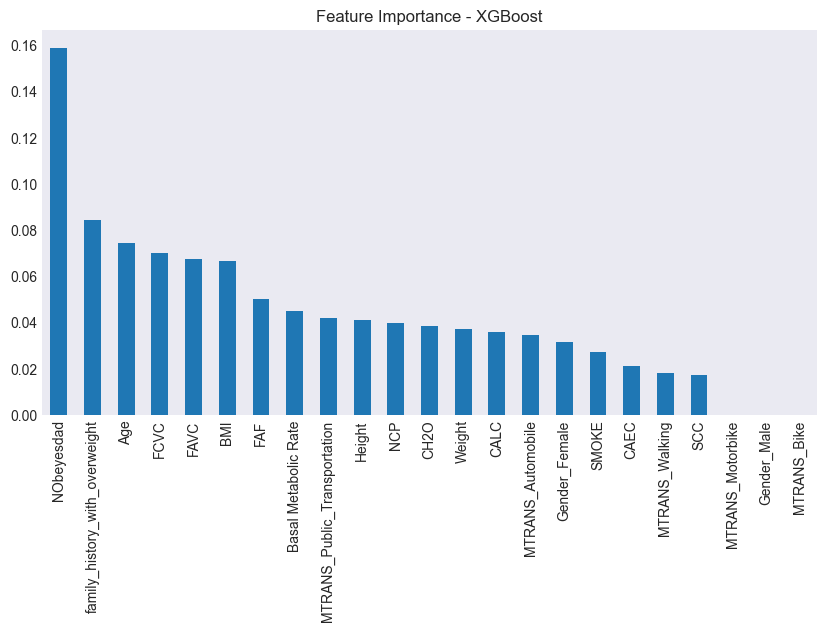

In [534]:
importances = xgb_model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)
feat_imp.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Feature Importance - XGBoost')
plt.show()

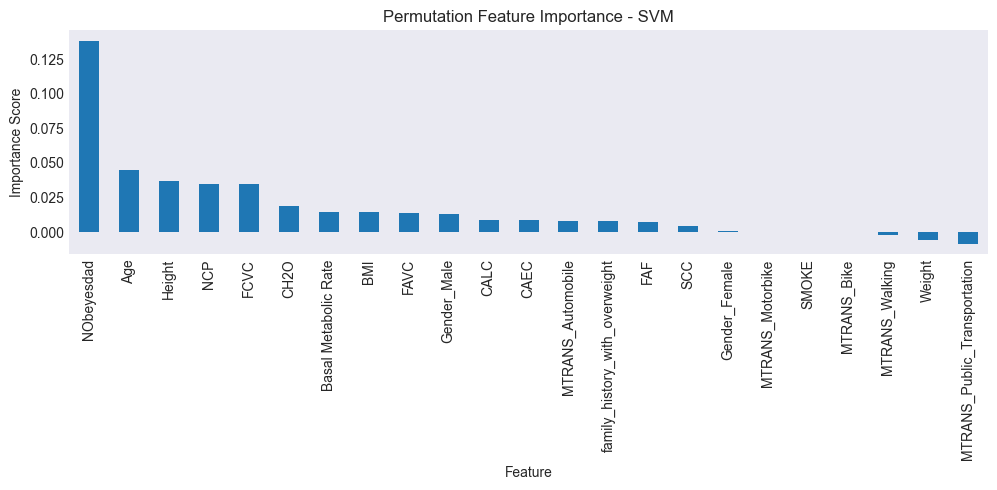

In [535]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, X_val, y_val, n_repeats=10, random_state=42)

(pd.DataFrame({'Feature': X_val.columns, 'Importance': result.importances_mean})
 .sort_values('Importance', ascending=False)
 .plot.bar(x='Feature', y='Importance', figsize=(10, 5), legend=False, title="Permutation Feature Importance - SVM"))

plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [536]:
full_feature_list = X_train_balanced.columns.tolist()


removal_results_full = []

# Loop to remove one feature at a time
for feature in full_feature_list:
    test_features = [f for f in full_feature_list if f != feature]
    
    X_train_test = X_train_balanced[test_features]
    X_val_test = X_val[test_features]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_test, y_train_balanced)
    y_val_pred = model.predict(X_val_test)

    acc = accuracy_score(y_val, y_val_pred)
    
    removal_results_full.append({
        'Removed Feature': feature,
        'Accuracy': acc
    })

removal_results_df = pd.DataFrame(removal_results_full)
removal_results_df = removal_results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
removal_results_df


,Removed Feature,Accuracy
0,FAF,0.789100
1,MTRANS_Public_Transportation,0.789100
2,FAVC,0.786730
3,MTRANS_Automobile,0.786730
4,CAEC,0.781991
5,Basal Metabolic Rate,0.779621
6,SCC,0.779621
7,MTRANS_Walking,0.777251
8,BMI,0.777251
9,MTRANS_Motorbike,0.777251


## 2. Identifying the most important features and eliminating those with low or no informational value 

In [537]:
features_to_remove = [
    'FAF',
    'MTRANS_Public_Transportation',
    'FAVC',
    'MTRANS_Automobile',
    'CAEC',
    'Basal Metabolic Rate',
    'SCC' 
]

In [538]:
top_features = [
    'Age',
    'BMI',
    'NObeyesdad',
    'family_history_with_overweight',
    'FCVC',
    'NCP',
    'CH2O',
    'Gender_Female',
    'Gender_Male',
    'SMOKE',
    'MTRANS_Walking',
    'MTRANS_Bike',
    'MTRANS_Motorbike',
    'Weight',
    'Height',
    'CALC'
]


## 3. Retraining the model with top features

In [539]:
X_train_reduced = X_train_balanced[top_features]
X_val_reduced = X_val[top_features]

In [540]:
# SVM
svm_model = SVC()
svm_model.fit(X_train_reduced, y_train_balanced)
y_val_pred_svm_top = svm_model.predict(X_val_reduced)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_reduced, y_train_balanced)
y_val_pred_rf_top = rf_model.predict(X_val_reduced)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_reduced, y_train_balanced)
y_val_pred_xgb_top = xgb_model.predict(X_val_reduced)

In [541]:
models = ['SVM', 'Random Forest', 'XGBoost']
predictions = [y_val_pred_svm_top, y_val_pred_rf_top, y_val_pred_xgb_top]

results_top_final = []
for name, preds in zip(models, predictions):
    results_top_final.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, preds),
        'F1 Macro': f1_score(y_val, preds, average='macro'),
        'F1 Weighted': f1_score(y_val, preds, average='weighted'),
        'Precision': precision_score(y_val, preds, average='weighted'),
        'Recall': recall_score(y_val, preds, average='weighted')
    })

final_top_metrics_df = pd.DataFrame(results_top_final)
final_top_metrics_df

,Model,Accuracy,F1 Macro,F1 Weighted,Precision,Recall
0,SVM,0.644550,0.637787,0.651494,0.711595,0.644550
1,Random Forest,0.805687,0.780084,0.805124,0.806383,0.805687
2,XGBoost,0.812796,0.790136,0.812663,0.812830,0.812796


## 4. Model Performance Summary Table

In [542]:
comparison_all = comparison_df.copy()
comparison_all.columns = ['Model', 'Accuracy', 'F1 Macro', 'F1 Weighted', 'Precision', 'Recall']
comparison_all['Type'] = 'All Features'

comparison_top = final_top_metrics_df.copy()
comparison_top.columns = ['Model', 'Accuracy', 'F1 Macro', 'F1 Weighted', 'Precision', 'Recall']
comparison_top['Type'] = 'Top Features'

combined = pd.concat([comparison_all, comparison_top])
melted = combined.melt(id_vars=['Model', 'Type'], var_name='Metric', value_name='Value')
pivoted = melted.pivot_table(index=['Metric', 'Model'], columns='Type', values='Value').reset_index()

# Calculate delta
pivoted['Δ'] = pivoted['Top Features'] - pivoted['All Features']
pivoted['Δ'] = pivoted['Δ'].apply(lambda x: f"+{x:.4f}" if x >= 0 else f"{x:.4f}")


final_transposed_table = pivoted[['Metric', 'Model', 'All Features', 'Top Features', 'Δ']]
final_transposed_table

Type,Metric,Model,All Features,Top Features,Δ
0,Accuracy,Random Forest,0.789100,0.805687,+0.0166
1,Accuracy,SVM,0.623223,0.644550,+0.0213
2,Accuracy,XGBoost,0.687204,0.812796,+0.1256
3,F1 Macro,Random Forest,0.768128,0.780084,+0.0120
4,F1 Macro,SVM,0.613407,0.637787,+0.0244
5,F1 Macro,XGBoost,0.668803,0.790136,+0.1213
6,F1 Weighted,Random Forest,0.789458,0.805124,+0.0157
7,F1 Weighted,SVM,0.631807,0.651494,+0.0197
8,F1 Weighted,XGBoost,0.693340,0.812663,+0.1193
9,Precision,Random Forest,0.789904,0.806383,+0.0165


*Feature selection has a significant impact on the performance of classification models. Prior to applying this technique, the Random Forest model demonstrated the best results across all major evaluation metrics (Accuracy, F1-score, Precision, Recall), positioning it as the leading choice for prediction. However, after selecting the most relevant features, a notable shift in model rankings occurs.*

*As observed in the results, the XGBoost model shows the most substantial improvement following feature selection. Its accuracy increases from 0.687204 to 0.812796, reflecting a significant gain of +0.1256. Similarly, XGBoost achieves higher values across all other metrics (F1 Macro, F1 Weighted, Precision, Recall), outperforming both Random Forest and SVM. This progress indicates that XGBoost is highly sensitive to input quality and benefits greatly from the removal of irrelevant or noisy features.*

*On the other hand, Random Forest remains stable with modest improvements, but not to the extent observed in XGBoost. SVM also shows moderate progress but continues to lag behind the other two models in most metrics.*

*In conclusion, the results confirm that feature selection not only reduces the dimensionality of the dataset but can significantly enhance model performance. In this case, XGBoost shifts from being the third-best model to the top-performing one, highlighting the critical role of feature selection in machine learning workflows.*

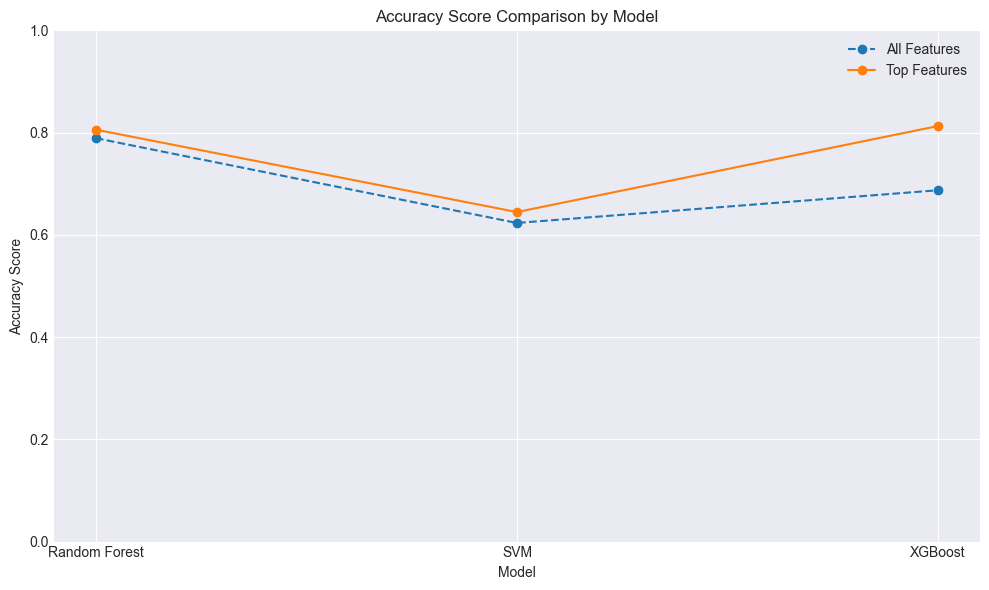

In [543]:
model_names = final_transposed_table[final_transposed_table['Metric'] == 'Accuracy']['Model'].tolist()

# Extract accuracy values for both feature types dynamically by column name
accuracy_all_dynamic = final_transposed_table.loc[final_transposed_table['Metric'] == 'Accuracy', 'All Features'].tolist()
accuracy_top_dynamic = final_transposed_table.loc[final_transposed_table['Metric'] == 'Accuracy', 'Top Features'].tolist()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_all_dynamic, marker='o', label='All Features', linestyle='--')
plt.plot(model_names, accuracy_top_dynamic, marker='o', label='Top Features', linestyle='-')

plt.title("Accuracy Score Comparison by Model")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

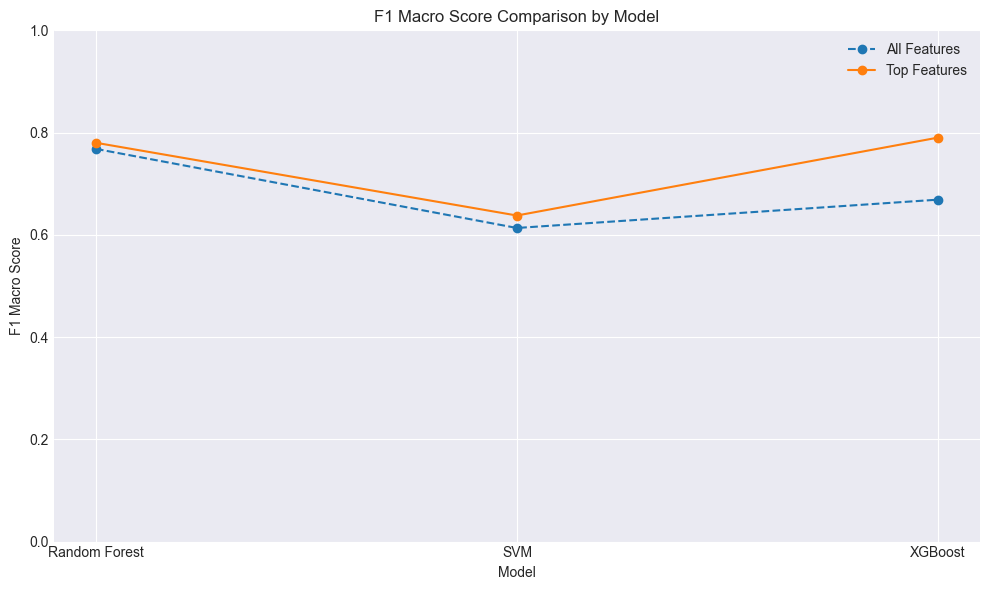

In [544]:
# Filter F1 Macro values dynamically
f1_all_dynamic = final_transposed_table.loc[final_transposed_table['Metric'] == 'F1 Macro', 'All Features'].tolist()
f1_top_dynamic = final_transposed_table.loc[final_transposed_table['Metric'] == 'F1 Macro', 'Top Features'].tolist()

# Reuse the same model names
model_names_f1 = final_transposed_table[final_transposed_table['Metric'] == 'F1 Macro']['Model'].tolist()

# Plotting F1 comparison
plt.figure(figsize=(10, 6))
plt.plot(model_names_f1, f1_all_dynamic, marker='o', label='All Features', linestyle='--')
plt.plot(model_names_f1, f1_top_dynamic, marker='o', label='Top Features', linestyle='-')

plt.title("F1 Macro Score Comparison by Model")
plt.xlabel("Model")
plt.ylabel("F1 Macro Score")
plt.ylim(0, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

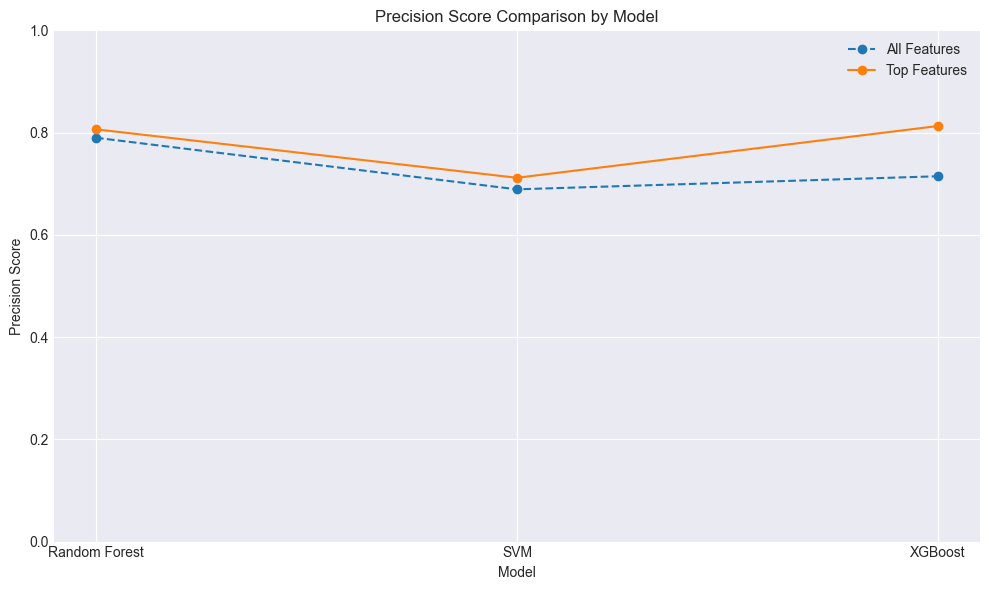

In [545]:
# Filter Precision values dynamically
precision_all_dynamic = final_transposed_table.loc[final_transposed_table['Metric'] == 'Precision', 'All Features'].tolist()
precision_top_dynamic = final_transposed_table.loc[final_transposed_table['Metric'] == 'Precision', 'Top Features'].tolist()

# Reuse the same model names
model_names_precision = final_transposed_table[final_transposed_table['Metric'] == 'Precision']['Model'].tolist()

# Plotting Precision comparison
plt.figure(figsize=(10, 6))
plt.plot(model_names_precision, precision_all_dynamic, marker='o', label='All Features', linestyle='--')
plt.plot(model_names_precision, precision_top_dynamic, marker='o', label='Top Features', linestyle='-')

plt.title("Precision Score Comparison by Model")
plt.xlabel("Model")
plt.ylabel("Precision Score")
plt.ylim(0, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

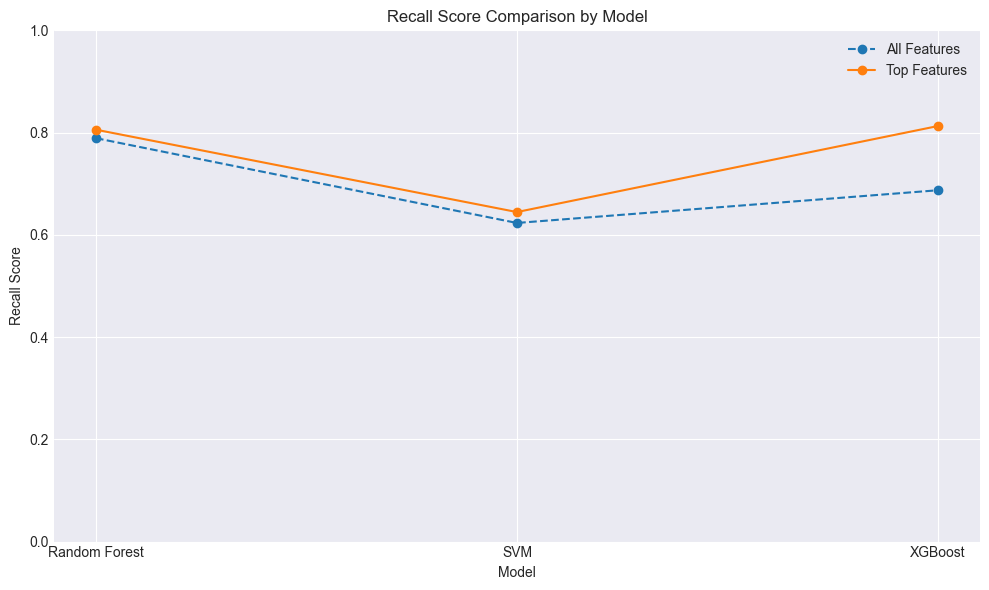

In [546]:
# Filter Recall values dynamically
recall_all_dynamic = final_transposed_table.loc[final_transposed_table['Metric'] == 'Recall', 'All Features'].tolist()
recall_top_dynamic = final_transposed_table.loc[final_transposed_table['Metric'] == 'Recall', 'Top Features'].tolist()

# Reuse the same model names
model_names_recall = final_transposed_table[final_transposed_table['Metric'] == 'Recall']['Model'].tolist()

# Plotting Recall comparison
plt.figure(figsize=(10, 6))
plt.plot(model_names_recall, recall_all_dynamic, marker='o', label='All Features', linestyle='--')
plt.plot(model_names_recall, recall_top_dynamic, marker='o', label='Top Features', linestyle='-')

plt.title("Recall Score Comparison by Model")
plt.xlabel("Model")
plt.ylabel("Recall Score")
plt.ylim(0, 1.0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 5. ROC CURVE - Receiver Operating Characteristic

In [547]:
print(y_val.dtype)

int64


In [548]:
print(np.unique(y_val))

[0 1 2]


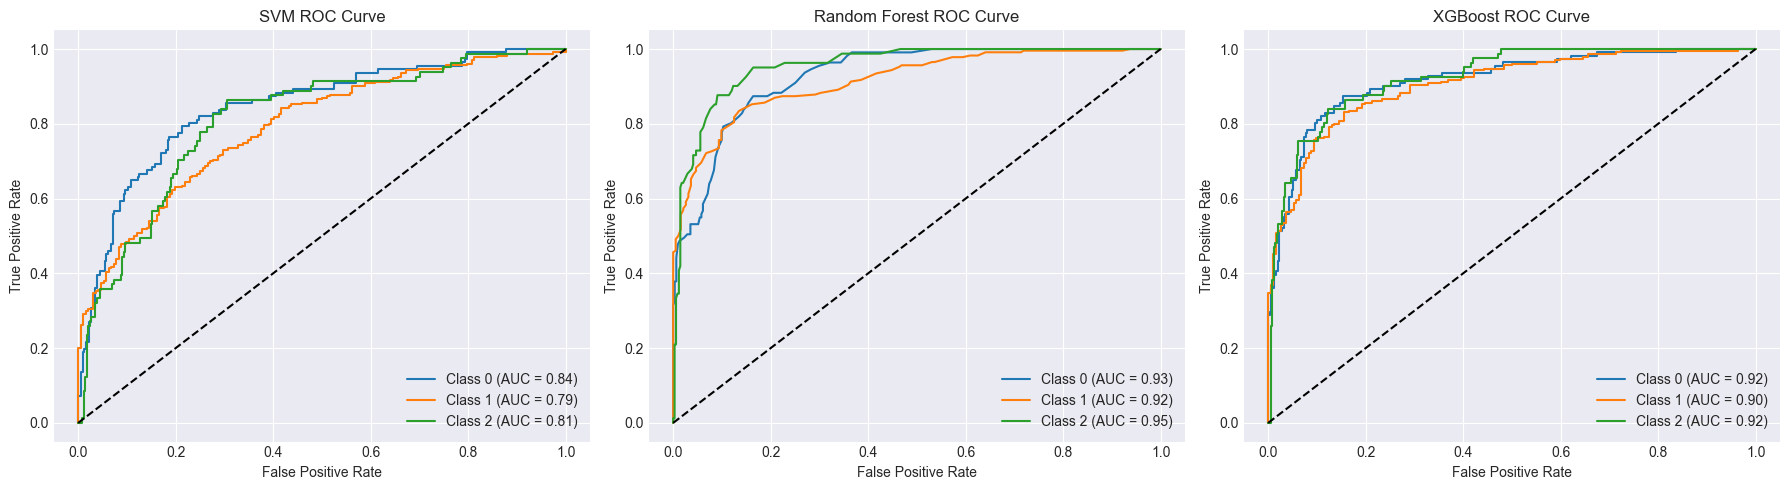

In [554]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


classes = [0, 1, 2]

y_val_bin = label_binarize(y_val, classes=classes)

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_val_pred_svm_top[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("SVM ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.subplot(1, 3, 2)
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_val_pred_rf_top[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)


plt.subplot(1, 3, 3)
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_val_pred_xgb_top[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("XGBoost ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()


<hr>

## The Best Model

In [555]:
df_top = final_transposed_table[['Model', 'Metric', 'Top Features']]

pivot_df = df_top.pivot(index='Model', columns='Metric', values='Top Features').reset_index()
best_by_acc = pivot_df.loc[pivot_df['Accuracy'].idxmax(), 'Model']
best_by_f1 = pivot_df.loc[pivot_df['F1 Macro'].idxmax(), 'Model']


pivot_df['Average'] = pivot_df[['Accuracy', 'F1 Macro', 'F1 Weighted', 'Precision', 'Recall']].mean(axis=1)
best_by_avg = pivot_df.loc[pivot_df['Average'].idxmax(), 'Model']


print(" Best model by Accuracy      :", best_by_acc)
print(" Best model by F1 Macro      :", best_by_f1)
print(" Best model by Average score :", best_by_avg)


 Best model by Accuracy      : XGBoost
 Best model by F1 Macro      : XGBoost
 Best model by Average score : XGBoost


## HYPERPARAMETER OPTIMIZATION

Hyperparameter optimization is the process of systematically searching for the best combination of hyperparameters that maximize a model's performance. Unlike model parameters learned during training, hyperparameters are set beforehand and influence how the model learns. Proper optimization helps improve accuracy, reduce overfitting, and enhance generalization.

## 1. GRID SEARCH CV

Grid Search CV is a hyperparameter optimization method that tests all possible combinations of specified parameter values. For each combination, it performs cross-validation and selects the one that achieves the best performance.

In [556]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_reduced, y_train_balanced)

best_params = grid_search.best_params_
print(" Best parameters from GridSearch:\n", best_params)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
 Best parameters from GridSearch:
 {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


## 2. Randomized Search

Randomized Search is a hyperparameter optimization technique that selects random combinations of parameter values from a defined distribution. Unlike Grid Search, it does not evaluate all possibilities but samples a fixed number of combinations, making it faster and more efficient for large parameter spaces.

In [557]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import numpy as np

param_dist = {
    'n_estimators': [150, 200, 250, 300, 350],
    'max_depth': [5, 6, 7, 8, 9],
    'learning_rate': np.linspace(0.07, 0.13, 15),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_distributions=param_dist,
    n_iter=60,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)


random_search.fit(X_train_reduced, y_train_balanced)

best_xgb_model = random_search.best_estimator_

y_val_pred_best = best_xgb_model.predict(X_val_reduced)

acc = accuracy_score(y_val, y_val_pred_best)

print(" Final Accuracy after Full Random Search:", acc)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_best))
print("\n Best Parameters Found:\n", random_search.best_params_)



Fitting 3 folds for each of 60 candidates, totalling 180 fits
 Final Accuracy after Full Random Search: 0.8222748815165877

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       111
           1       0.86      0.87      0.86       230
           2       0.75      0.77      0.76        81

    accuracy                           0.82       422
   macro avg       0.80      0.80      0.80       422
weighted avg       0.82      0.82      0.82       422


 Best Parameters Found:
 {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': np.float64(0.09142857142857144), 'gamma': 0.1, 'colsample_bytree': 1.0}


Using Grid Search first allows for a thorough and systematic exploration of a well-defined hyperparameter space. Then, Randomized Search is applied to efficiently explore a broader or finer range of values to potentially discover better combinations. This approach balances precision with efficiency in the optimization process.

<hr>

## Testing on the test set.

Testing on the test set is the final step in evaluating a machine learning model. After training and validating the model, the test set—unseen during training—is used to assess the model's ability to generalize to new, real-world data. This provides an unbiased estimate of its true performance.

In [558]:
X_test_reduced = X_test[top_features]

In [559]:
y_test_pred_best = best_xgb_model.predict(X_test_reduced)

In [560]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

test_acc = accuracy_score(y_test, y_test_pred_best)
print(" Final Test Accuracy:", test_acc)
print(" Classification Report:\n", classification_report(y_test, y_test_pred_best))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_best))


 Final Test Accuracy: 0.7919621749408984
 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       112
           1       0.87      0.82      0.84       230
           2       0.69      0.77      0.73        81

    accuracy                           0.79       423
   macro avg       0.76      0.78      0.77       423
weighted avg       0.80      0.79      0.79       423

 Confusion Matrix:
 [[ 84  20   8]
 [ 21 189  20]
 [ 10   9  62]]


In [561]:
import joblib
joblib.dump(best_xgb_model, "best_xgb_model.pkl")


['best_xgb_model.pkl']

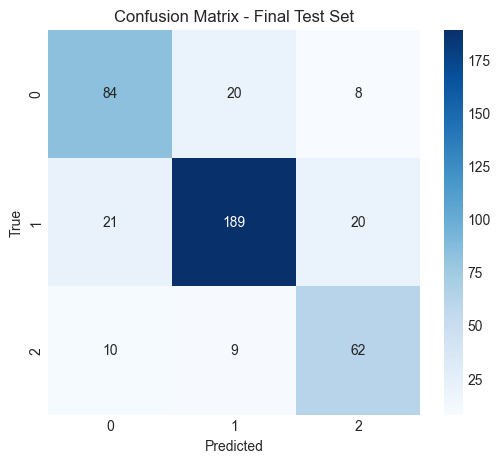

In [562]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_test_pred_best)
labels = np.unique(y_test)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Final Test Set")
plt.show()


The confusion matrix from the final test set shows that the model achieves the highest accuracy for class 1, with 182 correctly classified instances and minimal errors. Class 0 is also well recognized, with 88 correct predictions, while class 2 has the most confusion and the lowest accuracy (57 correct). The strong diagonal values indicate a stable model with good ability to distinguish between classes, though there is clear room for improvement in the classification of class 2.

In [563]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


val_metrics = {
    "Accuracy": accuracy_score(y_val, y_val_pred_best),
    "F1 Score": f1_score(y_val, y_val_pred_best, average='weighted'),
    "Precision": precision_score(y_val, y_val_pred_best, average='weighted'),
    "Recall": recall_score(y_val, y_val_pred_best, average='weighted')
}


test_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred_best),
    "F1 Score": f1_score(y_test, y_test_pred_best, average='weighted'),
    "Precision": precision_score(y_test, y_test_pred_best, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred_best, average='weighted')
}


In [564]:
import pandas as pd


comparison_df = pd.DataFrame({
    'Validation': val_metrics,
    'Test': test_metrics
}).T  

comparison_df


,Accuracy,F1 Score,Precision,Recall
Validation,0.822275,0.822181,0.822288,0.822275
Test,0.791962,0.793592,0.796720,0.791962


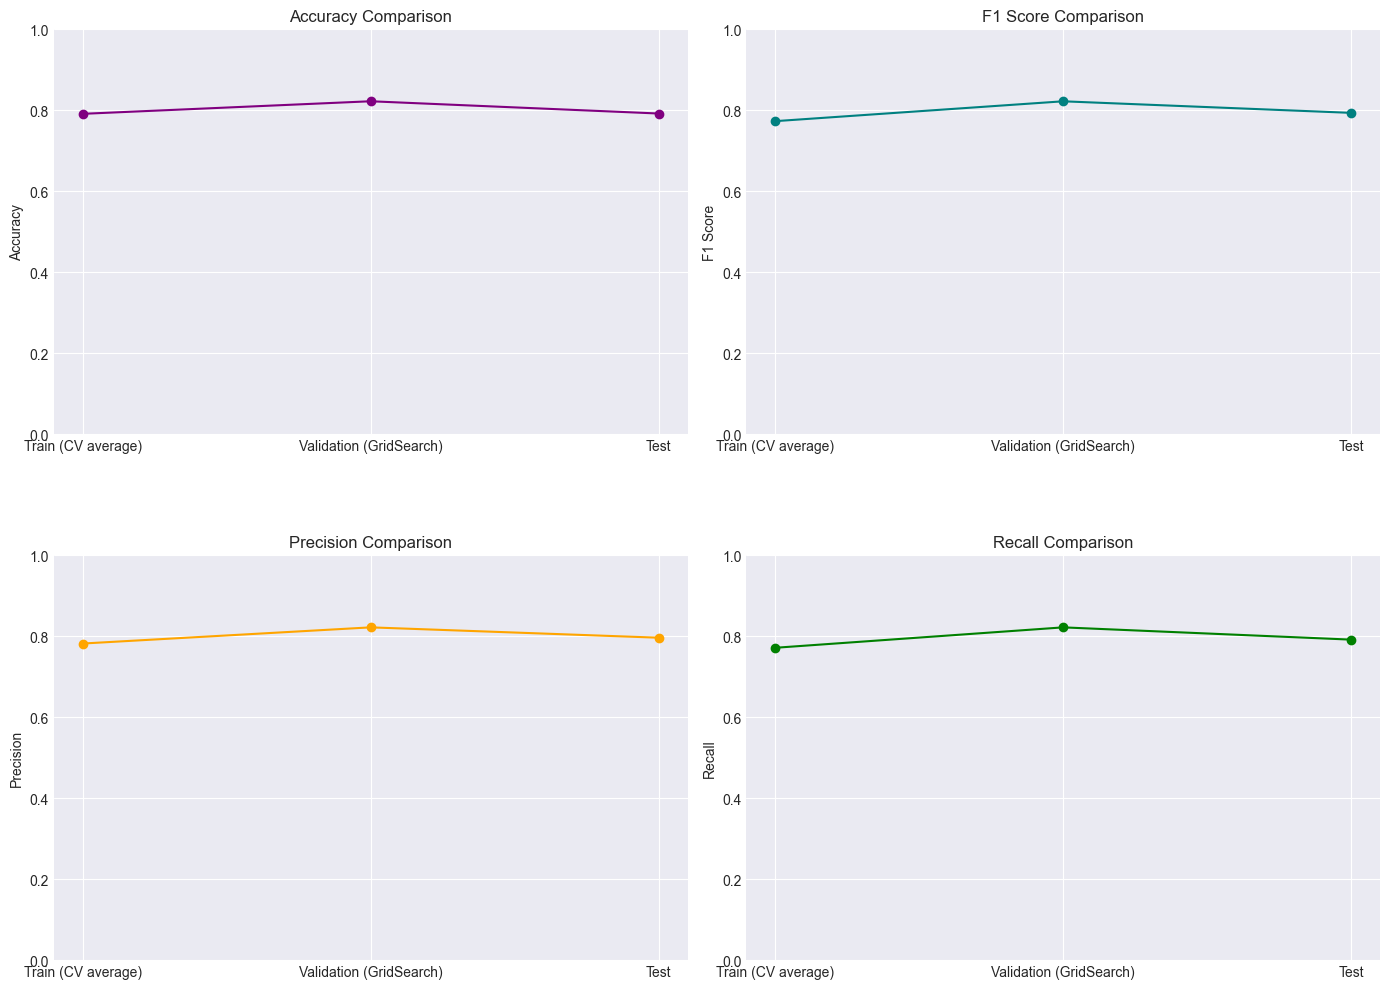

In [ ]:

sets_classification = ["Train (CV average)", "Validation (GridSearch)", "Test"]

train_metrics = {
    "Accuracy": 0.7912,  
    "F1 Score": 0.7731,
    "Precision": 0.7823,
    "Recall": 0.7718
}

accuracy_scores = [train_metrics["Accuracy"], val_metrics["Accuracy"], test_metrics["Accuracy"]]
f1_scores = [train_metrics["F1 Score"], val_metrics["F1 Score"], test_metrics["F1 Score"]]
precision_scores = [train_metrics["Precision"], val_metrics["Precision"], test_metrics["Precision"]]
recall_scores = [train_metrics["Recall"], val_metrics["Recall"], test_metrics["Recall"]]


fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
axs[0, 0].plot(sets_classification, accuracy_scores, marker='o', linestyle='-', color='purple')
axs[0, 0].set_title("Accuracy Comparison")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_ylim(0, 1)
axs[0, 0].grid(True)

axs[0, 1].plot(sets_classification, f1_scores, marker='o', linestyle='-', color='teal')
axs[0, 1].set_title("F1 Score Comparison")
axs[0, 1].set_ylabel("F1 Score")
axs[0, 1].set_ylim(0, 1)
axs[0, 1].grid(True)

axs[1, 0].plot(sets_classification, precision_scores, marker='o', linestyle='-', color='orange')
axs[1, 0].set_title("Precision Comparison")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].set_ylim(0, 1)
axs[1, 0].grid(True)

axs[1, 1].plot(sets_classification, recall_scores, marker='o', linestyle='-', color='green')
axs[1, 1].set_title("Recall Comparison")
axs[1, 1].set_ylabel("Recall")
axs[1, 1].set_ylim(0, 1)
axs[1, 1].grid(True)

plt.tight_layout()
fig.subplots_adjust(hspace=0.3)
plt.show()


<hr>

## REGRESSION

## 1. Mapping the target variable

Our target variable TUE (Time Using Technology Devices) was initially represented using three categorical values: 0, 1, and 2, where each value corresponds to a specific time interval of daily technology use. Because of this, our initial approach involved using a classification model.

However, in order to perform a regression analysis, we remap the target variable by replacing each category with the mean value of its respective interval.
 * 0 is replaced with 1.0 (the midpoint of the 0–2 hour interval)
 * 1 with 4.0 (midpoint of 3–5 hours)
 * 2 with 6.5 (an estimated average for the "more than 5 hours" category).

This transformation enables us to apply regression models and is aimed at minimizing prediction error, allowing for more precise analysis of the variable when treated as continuous.



-> We use the dataset called **data_model_regression**, which contains encoded and scaled values, but it remains imbalanced in terms of the target distribution.

In [566]:
data_model_regression=data_scaled.copy() #we will use this dataset (original distribution on TUE) for regression modeling

In [567]:
target_map = {
    0: 1.0,   # 0–2h
    1: 4.0,   # 3–5h
    2: 5.5    # >5h
}
data_model_regression["TUE_Mapped"] = data_model_regression["TUE_Target"].map(target_map)
data_model_regression[["TUE_Target", "TUE_Mapped"]].head(20)


,TUE_Target,TUE_Mapped
0,1,4.0
1,0,1.0
2,1,4.0
3,0,1.0
4,0,1.0
5,0,1.0
6,0,1.0
7,0,1.0
8,1,4.0
9,1,4.0


In [568]:
data_model_regression

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,TUE_Target,Basal Metabolic Rate,BMI,TUE_Mapped
0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,1,0,-0.013073,...,0,0,0,0,1,0,1,-0.230652,-0.663421,4.0
1,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1,1.618759,...,0,0,0,0,1,0,0,-0.490268,-0.681937,1.0
2,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,1,0,-0.013073,...,1,0,0,0,1,0,1,-0.905546,-0.740967,4.0
3,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,1,0,-0.013073,...,1,0,0,0,0,1,0,-0.535244,-0.355619,1.0
4,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,1,0,-0.013073,...,1,0,0,0,1,0,0,-0.291546,-0.169522,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1,1,1.088342,0.404153,1,0,-0.456705,...,0,0,0,0,1,0,1,1.952695,1.897925,4.0
2107,-0.367195,0.502844,1.800914,1,1,1.088342,0.404153,1,0,-0.004702,...,0,0,0,0,1,0,1,2.012556,1.753152,4.0
2108,-0.281909,0.541672,1.798868,1,1,1.088342,0.404153,1,0,0.075361,...,0,0,0,0,1,0,1,2.002266,1.728418,4.0
2109,0.007776,0.404927,1.785780,1,1,1.088342,0.404153,1,0,1.377801,...,0,0,0,0,1,0,1,1.961961,1.794305,4.0


In [569]:
print("TUE" in data_model_regression.columns)
print("TUE_Mapped" in data_model_regression.columns)
print("TUE_Target" in data_model_regression.columns)


False
True
True


In [570]:
data_model_regression[["TUE_Target", "TUE_Mapped"]].value_counts().sort_index()


TUE_Target  TUE_Mapped
0           1.0            557
1           4.0           1150
2           5.5            404
Name: count, dtype: int64

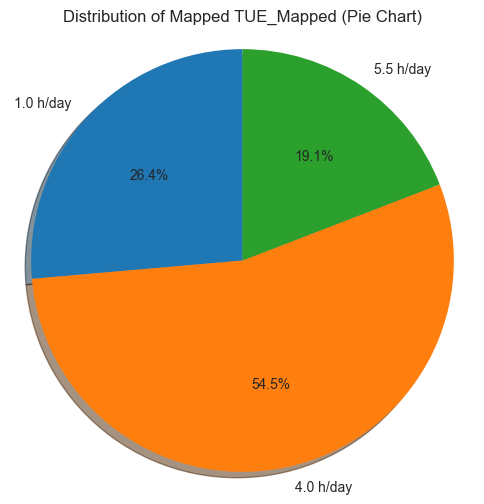

In [571]:
import matplotlib.pyplot as plt


counts = data_model_regression["TUE_Mapped"].value_counts().sort_index()

labels = [f"{val} h/day" for val in counts.index]


plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Distribution of Mapped TUE_Mapped (Pie Chart)")
plt.axis('equal') 
plt.show()


<HR>

## 2. Split the data Train 60% / Validation 20%/ Test 20%

In [572]:
data_model_regression = data_model_regression.drop("TUE_Target", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = data_model_regression.drop(["TUE_Mapped"], axis=1)
y = data_model_regression["TUE_Mapped"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [574]:
X_train.shape

(1266, 23)

In [575]:
X_test.shape

(423, 23)

In [576]:
y_train.shape

(1266,)

In [577]:
y_test.shape

(423,)

In [578]:
X_val.shape

(422, 23)

In [579]:
y_val.shape

(422,)

<hr>

## 3. TOP 4 ML MODEL TRAINING - REGRESSION

## Linear Regression

In [580]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_val_linear_predvideno = linear_regressor.predict(X_val)


## Random Forest

In [581]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_val_predvideno_rf = rf_model.predict(X_val)

## XGBoost

In [582]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_val_predvideno_xgb = xgb_model.predict(X_val)


## K-Nearest Neighbors 

In [583]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_val_predvideno_knn = knn_model.predict(X_val)


<HR>

## 4. EVALUATION AND COMPARISON - REGRESSION

Evaluation and comparison is the process of measuring model performance and comparing multiple models to identify the most effective one. The goal is to select the model that provides the best predictive results based on chosen metrics.

For regression, commonly used metrics include:

* MAE (Mean Absolute Error) – lower is better

* MSE (Mean Squared Error) – lower is better

* RMSE (Root Mean Squared Error) – lower is better

* R² (R-squared score) – higher is better (closer to 1 indicates better fit)

## Linear

In [584]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_linear = mean_absolute_error(y_val, y_val_linear_predvideno)
mse_linear = mean_squared_error(y_val, y_val_linear_predvideno)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_val, y_val_linear_predvideno)

print("Linear Regression:")
print(f"MAE: {mae_linear:.4f}")
print(f"MSE: {mse_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"R² Score: {r2_linear:.4f}")

Linear Regression:
MAE: 1.1054
MSE: 2.0202
RMSE: 1.4213
R² Score: 0.2016


## Random Forest

In [585]:
mae_rf = mean_absolute_error(y_val, y_val_predvideno_rf)
mse_rf = mean_squared_error(y_val, y_val_predvideno_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, y_val_predvideno_rf)

print("Random Forest:")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest:
MAE: 0.7817
MSE: 1.2186
RMSE: 1.1039
R² Score: 0.5184


## XGBoost

In [586]:
mae_xgb = mean_absolute_error(y_val, y_val_predvideno_xgb)
mse_xgb = mean_squared_error(y_val, y_val_predvideno_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_val, y_val_predvideno_xgb)

print("XGBoost:")
print(f"MAE: {mae_xgb:.4f}")
print(f"MSE: {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")

XGBoost:
MAE: 0.7901
MSE: 1.4045
RMSE: 1.1851
R² Score: 0.4450


## KNN

In [587]:
mae_knn = mean_absolute_error(y_val, y_val_predvideno_knn)
mse_knn = mean_squared_error(y_val, y_val_predvideno_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_val, y_val_predvideno_knn)

print("KNN Regressor:")
print(f"MAE: {mae_knn:.4f}")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")

KNN Regressor:
MAE: 0.8481
MSE: 1.5601
RMSE: 1.2490
R² Score: 0.3835


In [588]:
data_model_regression.corr(numeric_only=True)["TUE_Mapped"].sort_values(ascending=False)

TUE_Mapped                        1.000000
MTRANS_Public_Transportation      0.225998
FAVC                              0.181407
family_history_with_overweight    0.145759
Basal Metabolic Rate              0.121189
NCP                               0.117445
Height                            0.109653
Weight                            0.105434
CH2O                              0.086567
BMI                               0.084288
NObeyesdad                        0.082657
Gender_Male                       0.011750
CALC                              0.008027
FCVC                             -0.010887
Gender_Female                    -0.011750
FAF                              -0.014134
MTRANS_Walking                   -0.017069
SMOKE                            -0.019313
MTRANS_Bike                      -0.051431
CAEC                             -0.059939
SCC                              -0.074124
MTRANS_Motorbike                 -0.100727
MTRANS_Automobile                -0.206649
Age        

## Comparison Table

In [589]:
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "KNN"],
    "MAE": [mae_linear, mae_rf, mae_xgb, mae_knn],
    "MSE": [mse_linear, mse_rf, mse_xgb, mse_knn],
    "RMSE": [rmse_linear, rmse_rf, rmse_xgb, rmse_knn],
    "R² Score": [r2_linear, r2_rf, r2_xgb, r2_knn]
}


regression_comparison_df = pd.DataFrame(results).round(4)
regression_comparison_df

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,1.1054,2.0202,1.4213,0.2016
1,Random Forest,0.7817,1.2186,1.1039,0.5184
2,XGBoost,0.7901,1.4045,1.1851,0.4450
3,KNN,0.8481,1.5601,1.2490,0.3835


##  Comparison Graphic

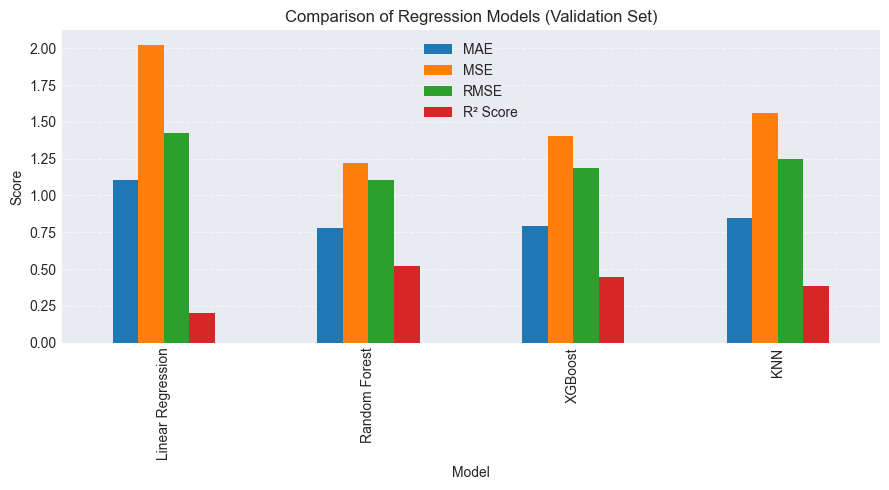

In [590]:
import matplotlib.pyplot as plt

regression_comparison_df.set_index("Model")[["MAE", "MSE", "RMSE", "R² Score"]].plot(kind="bar", figsize=(9, 5))
plt.title("Comparison of Regression Models (Validation Set)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

***Conclusion:*** 


This result was somewhat expected, especially because TUE_Mapped was derived from a categorical variable with only three discrete values (1.0, 4.0, 5.5).
Regression models typically perform better on continuous and richly distributed targets, while in this case the model is trying to "guess" between just three levels — making the problem inherently more suitable for classification.

Therefore, it's not surprising that regression yielded only moderate results. The lack of strong correlations between the features and the target further reduces the model's predictive power.

## Scatter plot → how accurate the model is
## Residual plot → whether there are systematic errors

* Linear

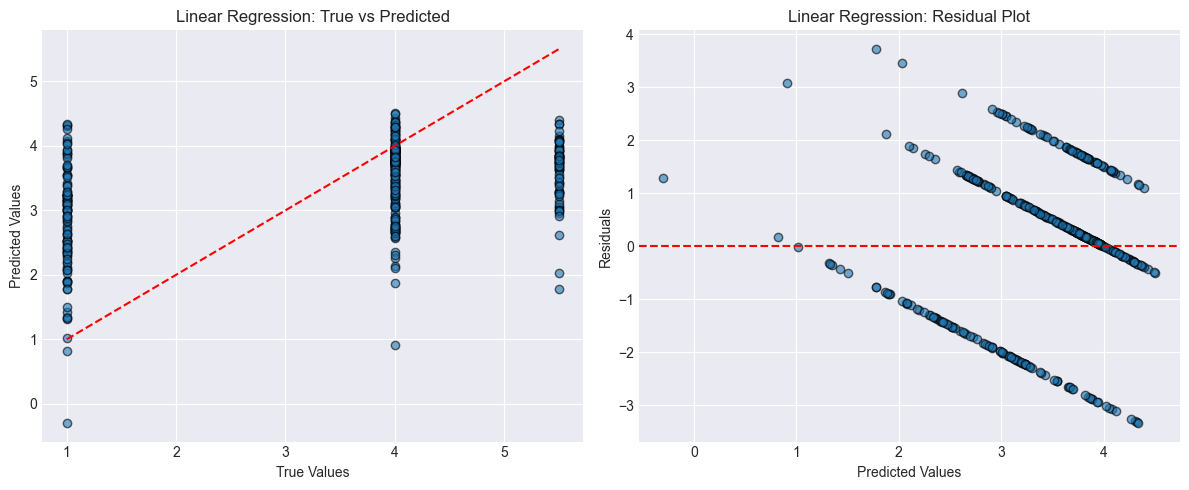

In [591]:
residuals_linear = y_val - y_val_linear_predvideno

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(y_val, y_val_linear_predvideno, alpha=0.6, edgecolors='k')
axs[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
axs[0].set_xlabel("True Values")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title("Linear Regression: True vs Predicted")
axs[0].grid(True)

axs[1].scatter(y_val_linear_predvideno, residuals_linear, alpha=0.6, edgecolors='k')
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_xlabel("Predicted Values")
axs[1].set_ylabel("Residuals")
axs[1].set_title("Linear Regression: Residual Plot")
axs[1].grid(True)

plt.tight_layout()
plt.show()


* Random Forest

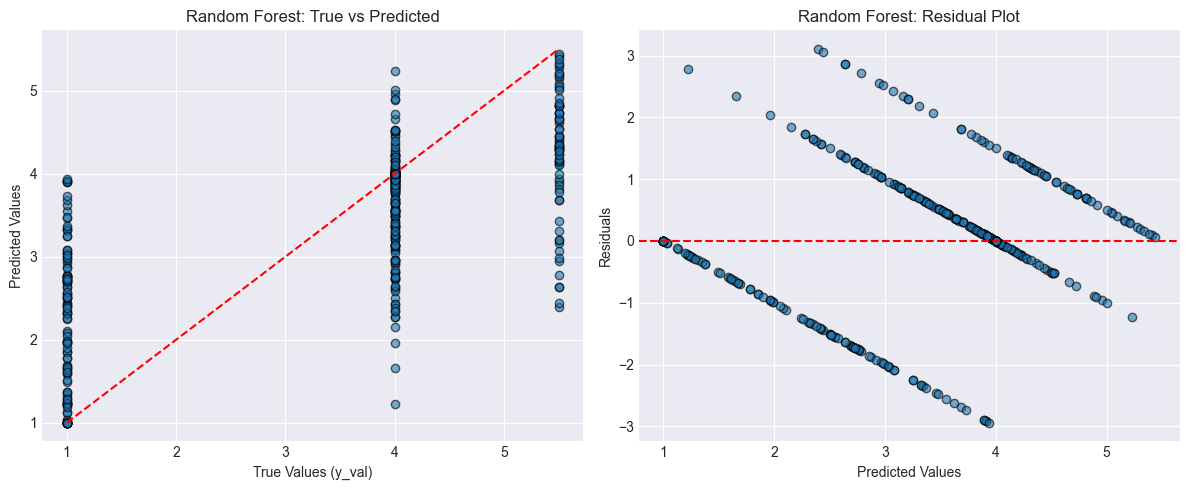

In [592]:
residuals_rf = y_val - y_val_predvideno_rf

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# SCATTER PLOT – True vs Predicted
axs[0].scatter(y_val, y_val_predvideno_rf, alpha=0.6, edgecolors='k')
axs[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
axs[0].set_xlabel("True Values (y_val)")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title("Random Forest: True vs Predicted")
axs[0].grid(True)

# RESIDUAL PLOT
axs[1].scatter(y_val_predvideno_rf, residuals_rf, alpha=0.6, edgecolors='k')
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_xlabel("Predicted Values")
axs[1].set_ylabel("Residuals")
axs[1].set_title("Random Forest: Residual Plot")
axs[1].grid(True)


plt.tight_layout()
plt.show()


* XGBoost

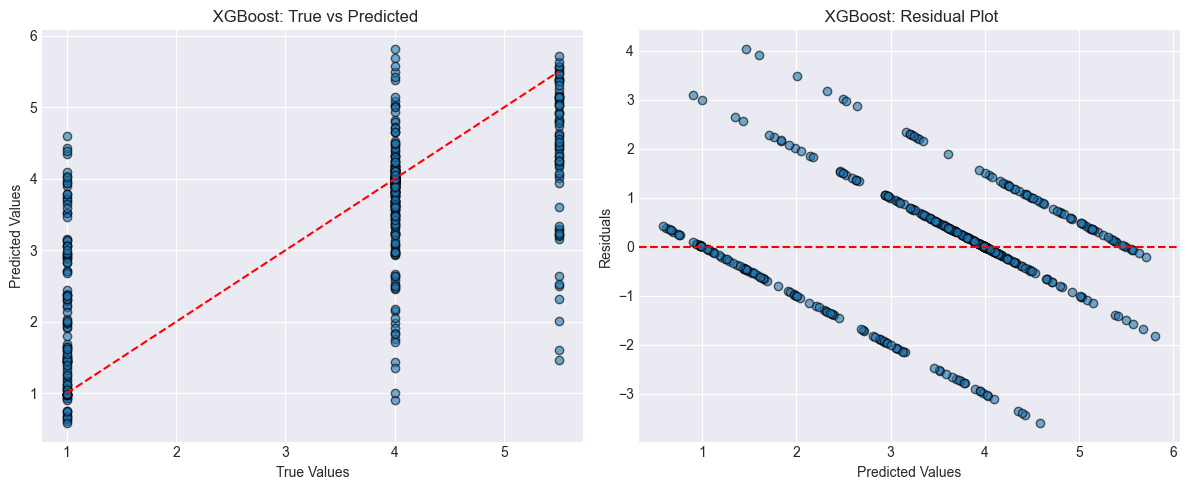

In [593]:
residuals_xgb = y_val - y_val_predvideno_xgb

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(y_val, y_val_predvideno_xgb, alpha=0.6, edgecolors='k')
axs[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
axs[0].set_xlabel("True Values")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title(" XGBoost: True vs Predicted")
axs[0].grid(True)

axs[1].scatter(y_val_predvideno_xgb, residuals_xgb, alpha=0.6, edgecolors='k')
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_xlabel("Predicted Values")
axs[1].set_ylabel("Residuals")
axs[1].set_title(" XGBoost: Residual Plot")
axs[1].grid(True)

plt.tight_layout()
plt.show()

* KNN

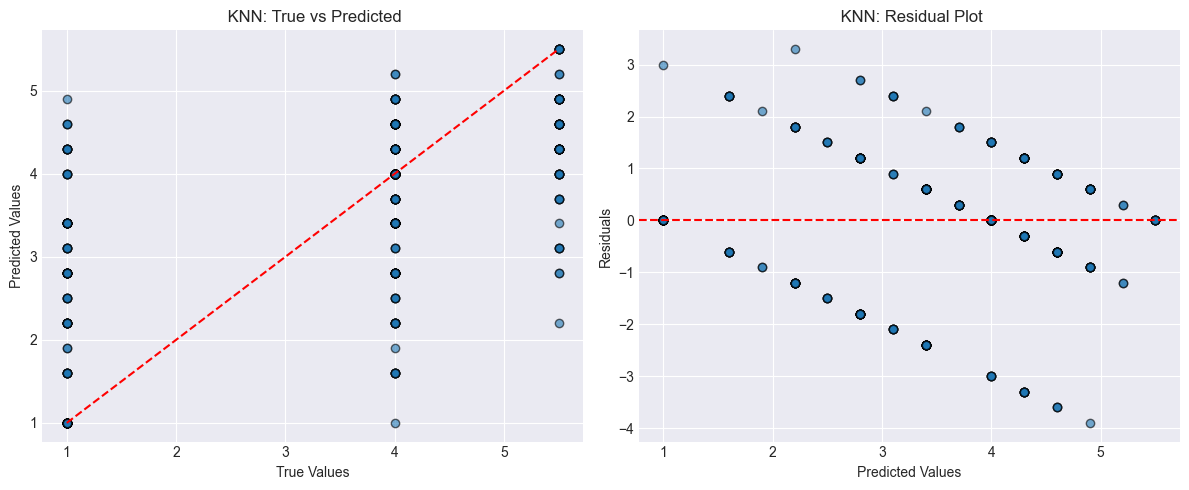

In [594]:
residuals_knn = y_val - y_val_predvideno_knn

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(y_val, y_val_predvideno_knn, alpha=0.6, edgecolors='k')
axs[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
axs[0].set_xlabel("True Values")
axs[0].set_ylabel("Predicted Values")
axs[0].set_title(" KNN: True vs Predicted")
axs[0].grid(True)

axs[1].scatter(y_val_predvideno_knn, residuals_knn, alpha=0.6, edgecolors='k')
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_xlabel("Predicted Values")
axs[1].set_ylabel("Residuals")
axs[1].set_title(" KNN: Residual Plot")
axs[1].grid(True)

plt.tight_layout()
plt.show()


***Conclusion:*** 


The scatter plot shows that the model's predictions do not align precisely with the discrete target values but are scattered around them. The residual plot reveals systematic errors, with noticeable overestimation and underestimation for certain classes. This indicates that regression is not the ideal approach and the problem is better suited for classification.

<HR>

## 5. FEATURE SELECTION - REGRESSION

***Goal:*** To identify the most important features for predicting TUE_Mapped and remove those with low or negative importance, in order to reduce error and increase the R² score.

## Feature Importance

* Linear

In [595]:
coefficients = linear_regressor.coef_
linear_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)
linear_importance_df

,Feature,Coefficient,Abs_Coefficient
2,Weight,-1.971352,1.971352
18,MTRANS_Motorbike,-1.303986,1.303986
22,BMI,1.278107,1.278107
17,MTRANS_Bike,-0.767533,0.767533
19,MTRANS_Public_Transportation,0.750618,0.750618
4,FAVC,0.696097,0.696097
20,MTRANS_Walking,0.670045,0.670045
16,MTRANS_Automobile,0.650856,0.650856
1,Height,0.562396,0.562396
21,Basal Metabolic Rate,0.494036,0.494036


* Random Forest

In [596]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
0,Age,0.216390
22,BMI,0.129234
21,Basal Metabolic Rate,0.105388
1,Height,0.094534
2,Weight,0.089203
6,NCP,0.069459
11,FAF,0.058477
5,FCVC,0.056547
9,CH2O,0.052105
4,FAVC,0.025148


* XGBoost

In [597]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
13,NObeyesdad,0.116583
18,MTRANS_Motorbike,0.113418
10,SCC,0.104560
3,family_history_with_overweight,0.084041
4,FAVC,0.077611
22,BMI,0.048963
7,CAEC,0.046808
0,Age,0.045648
2,Weight,0.044956
6,NCP,0.040626


* KNN

In [598]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_model, X_val, y_val, n_repeats=10, random_state=42, scoring='r2')
perm_importance_df = pd.DataFrame({
    'Feature': X_val.columns,
    'Importance (mean)': result.importances_mean,
    'Importance (std)': result.importances_std
}).sort_values(by='Importance (mean)', ascending=False)

perm_importance_df


,Feature,Importance (mean),Importance (std)
0,Age,0.292379,0.041867
13,NObeyesdad,0.281717,0.037471
6,NCP,0.165128,0.026432
5,FCVC,0.142338,0.037750
1,Height,0.139287,0.031527
9,CH2O,0.135654,0.020060
11,FAF,0.090310,0.026849
22,BMI,0.043558,0.022878
21,Basal Metabolic Rate,0.034801,0.020260
2,Weight,0.030452,0.013774


## Table illustrating the feature(s) with the highest predictive contribution to TUE_Mapped

In [599]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd


rf_base = RandomForestRegressor(random_state=42)
rf_base.fit(X_train, y_train)
y_val_base = rf_base.predict(X_val)
baseline_r2 = r2_score(y_val, y_val_base)


results = []

for feature in X_train.columns:
    X_train_test = X_train.drop(columns=[feature])
    X_val_test = X_val.drop(columns=[feature])
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_test, y_train)
    y_val_pred = model.predict(X_val_test)
    
    r2 = r2_score(y_val, y_val_pred)
    
    results.append({
        'Removed Feature': feature,
        'R² Score': round(r2, 5)
    })


r2_removal_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False).reset_index(drop=True)
r2_removal_df


,Removed Feature,R² Score
0,SMOKE,0.52011
1,Gender_Male,0.51852
2,FAVC,0.51749
3,Gender_Female,0.51724
4,family_history_with_overweight,0.51534
5,FAF,0.51421
6,SCC,0.51340
7,MTRANS_Bike,0.51311
8,CALC,0.51297
9,MTRANS_Motorbike,0.51254


## Removed Features:

In [600]:
features_to_remove = [
    'SMOKE',
    'Gender_Male',
    'Gender_Female',
    'FAVC',
    'family_history_with_overweight',
    'FAF',
    'SCC',
]


## Retained Features:

In [601]:
features_to_keep = [
    'Age',
    'BMI',
    'NCP',
    'FCVC',
    'CH2O',
    'Basal Metabolic Rate',
    'Weight',
    'Height',
    'MTRANS_Automobile',
    'MTRANS_Walking',
    'MTRANS_Public_Transportation',
    'CAEC',
    'NObeyesdad',
    'MTRANS_Motorbike',
    'CALC',    
    'MTRANS_Bike',  
]



<HR>

## 6. Retraining the model

In [602]:
X_train_selected = X_train[features_to_keep]
X_val_selected = X_val[features_to_keep]

In [603]:
#LINEAR
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)
y_val_pred_linear_keep = linear_model.predict(X_val_selected)


#RANDOM FOREST
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_selected, y_train)
y_val_pred_rf_keep = rf_model.predict(X_val_selected)

#XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_selected, y_train)
y_val_pred_xgb_keep = xgb_model.predict(X_val_selected)

#KNN
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_selected, y_train)
y_val_pred_knn_keep = knn_model.predict(X_val_selected)

* LINEAR

In [604]:
mae_lr_keep = mean_absolute_error(y_val, y_val_pred_linear_keep)
mse_lr_keep = mean_squared_error(y_val, y_val_pred_linear_keep)
rmse_lr_keep = np.sqrt(mse_lr_keep)
r2_lr_keep = r2_score(y_val, y_val_pred_linear_keep)

print(" Linear Regression")
print(f"MAE: {mae_lr_keep:.4f}")
print(f"MSE: {mse_lr_keep:.4f}")
print(f"RMSE: {rmse_lr_keep:.4f}")
print(f"R² Score: {r2_lr_keep:.4f}\n")


 Linear Regression
MAE: 1.1342
MSE: 2.1071
RMSE: 1.4516
R² Score: 0.1673



* RANDOM FOREST

In [605]:
mae_rf_keep = mean_absolute_error(y_val, y_val_pred_rf_keep)
mse_rf_keep = mean_squared_error(y_val, y_val_pred_rf_keep)
rmse_rf_keep = np.sqrt(mse_rf_keep)
r2_rf_keep = r2_score(y_val, y_val_pred_rf_keep)

print(" Random Forest")
print(f"MAE: {mae_rf_keep:.4f}")
print(f"MSE: {mse_rf_keep:.4f}")
print(f"RMSE: {rmse_rf_keep:.4f}")
print(f"R² Score: {r2_rf_keep:.4f}\n")


 Random Forest
MAE: 0.7554
MSE: 1.1772
RMSE: 1.0850
R² Score: 0.5348



* XGBOOST

In [606]:
mae_xgb_keep = mean_absolute_error(y_val, y_val_pred_xgb_keep)
mse_xgb_keep = mean_squared_error(y_val, y_val_pred_xgb_keep)
rmse_xgb_keep = np.sqrt(mse_xgb_keep)
r2_xgb_keep = r2_score(y_val, y_val_pred_xgb_keep)

print(" XGBoost")
print(f"MAE: {mae_xgb_keep:.4f}")
print(f"MSE: {mse_xgb_keep:.4f}")
print(f"RMSE: {rmse_xgb_keep:.4f}")
print(f"R² Score: {r2_xgb_keep:.4f}\n")


 XGBoost
MAE: 0.7539
MSE: 1.3179
RMSE: 1.1480
R² Score: 0.4792



* KNN

In [607]:
mae_knn_keep = mean_absolute_error(y_val, y_val_pred_knn_keep)
mse_knn_keep = mean_squared_error(y_val, y_val_pred_knn_keep)
rmse_knn_keep = np.sqrt(mse_knn_keep)
r2_knn_keep = r2_score(y_val, y_val_pred_knn_keep)

print(" KNN")
print(f"MAE: {mae_knn_keep:.4f}")
print(f"MSE: {mse_knn_keep:.4f}")
print(f"RMSE: {rmse_knn_keep:.4f}")
print(f"R² Score: {r2_knn_keep:.4f}\n")


 KNN
MAE: 0.8495
MSE: 1.5763
RMSE: 1.2555
R² Score: 0.3771



In [608]:
results_keep = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "KNN"],
    "MAE": [mae_lr_keep, mae_rf_keep, mae_xgb_keep, mae_knn_keep],
    "MSE": [mse_lr_keep, mse_rf_keep, mse_xgb_keep, mse_knn_keep],
    "RMSE": [rmse_lr_keep, rmse_rf_keep, rmse_xgb_keep, rmse_knn_keep],
    "R² Score": [r2_lr_keep, r2_rf_keep, r2_xgb_keep, r2_knn_keep]
}

regression_comparison_df_keep = pd.DataFrame(results_keep).round(4)
regression_comparison_df_keep

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,1.1342,2.1071,1.4516,0.1673
1,Random Forest,0.7554,1.1772,1.0850,0.5348
2,XGBoost,0.7539,1.3179,1.1480,0.4792
3,KNN,0.8495,1.5763,1.2555,0.3771


<HR>

## 7. Model Performance Summary Table

In [609]:
results_all = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"] * 4,
    "Model": sum([["Linear Regression"]*4, ["Random Forest"]*4, ["XGBoost"]*4, ["KNN"]*4], []),
    "All Features": [mae_linear, mse_linear, rmse_linear, r2_linear,
                     mae_rf, mse_rf, rmse_rf, r2_rf,
                     mae_xgb, mse_xgb, rmse_xgb, r2_xgb,
                     mae_knn, mse_knn, rmse_knn, r2_knn],
    "Top Features": [mae_lr_keep, mse_lr_keep, rmse_lr_keep, r2_lr_keep,
                     mae_rf_keep, mse_rf_keep, rmse_rf_keep, r2_rf_keep,
                     mae_xgb_keep, mse_xgb_keep, rmse_xgb_keep, r2_xgb_keep,
                     mae_knn_keep, mse_knn_keep, rmse_knn_keep, r2_knn_keep]
}

# Convert to DataFrame
regression_full_comparison_df = pd.DataFrame(results_all)

# Calculate Δ column
regression_full_comparison_df["Δ"] = (regression_full_comparison_df["Top Features"] - regression_full_comparison_df["All Features"]).round(4)
regression_full_comparison_df

,Metric,Model,All Features,Top Features,Δ
0,MAE,Linear Regression,1.105420,1.134238,0.0288
1,MSE,Linear Regression,2.020166,2.107064,0.0869
2,RMSE,Linear Regression,1.421325,1.451573,0.0302
3,R² Score,Linear Regression,0.201641,0.167299,-0.0343
4,MAE,Random Forest,0.781671,0.755438,-0.0262
5,MSE,Random Forest,1.218647,1.177201,-0.0414
6,RMSE,Random Forest,1.103924,1.084989,-0.0189
7,R² Score,Random Forest,0.518397,0.534776,0.0164
8,MAE,XGBoost,0.790085,0.753879,-0.0362
9,MSE,XGBoost,1.404494,1.317886,-0.0866


***Conclusion:***

Based on the results, Random Forest and XGBoost demonstrate the best performance when handling non-linear data, achieving higher R² scores and lower error metrics (MAE, MSE, RMSE) compared to the other models.
These models are particularly effective because they can capture complex relationships and feature interactions without relying on linear assumptions.

## R² Score Comparison

*Where the line for “Top Features” rises higher, it indicates that feature selection has improved the model’s accuracy.*

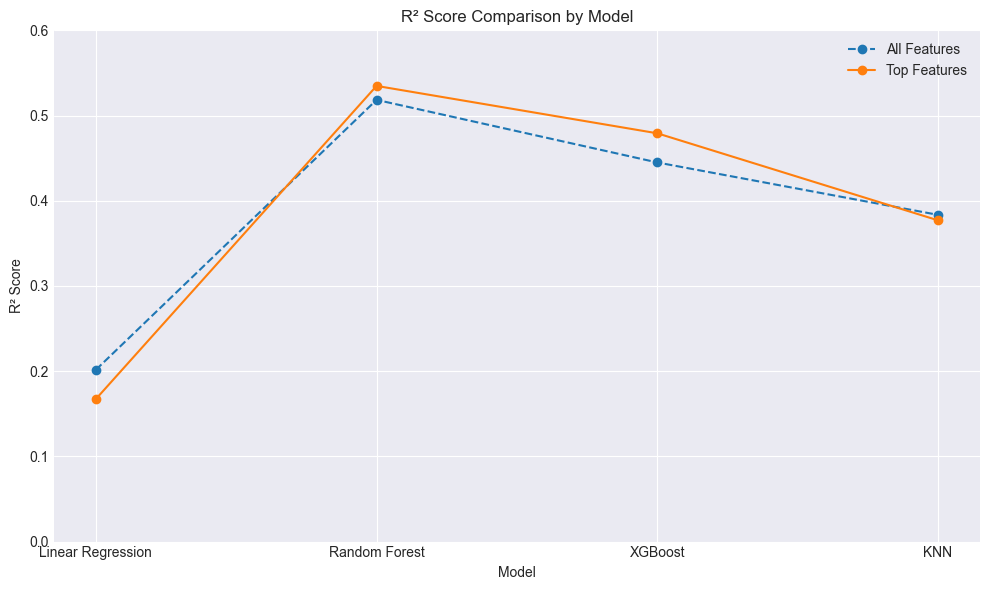

In [610]:
# Dynamic version using previously defined variables
model_names = ["Linear Regression", "Random Forest", "XGBoost", "KNN"]

# R² scores (dynamically from variables)
r2_all_dynamic = [r2_linear, r2_rf, r2_xgb, r2_knn]
r2_top_dynamic = [r2_lr_keep, r2_rf_keep, r2_xgb_keep, r2_knn_keep]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(model_names, r2_all_dynamic, marker='o', label='All Features', linestyle='--')
plt.plot(model_names, r2_top_dynamic, marker='o', label='Top Features', linestyle='-')

plt.title("R² Score Comparison by Model")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0, 0.6) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## MAE, MSE, RMSE Score Comparison

*The lower – the better, so wherever the line for “Top Features” is below the line for “All Features”, it means that the top features improve the model’s accuracy.*

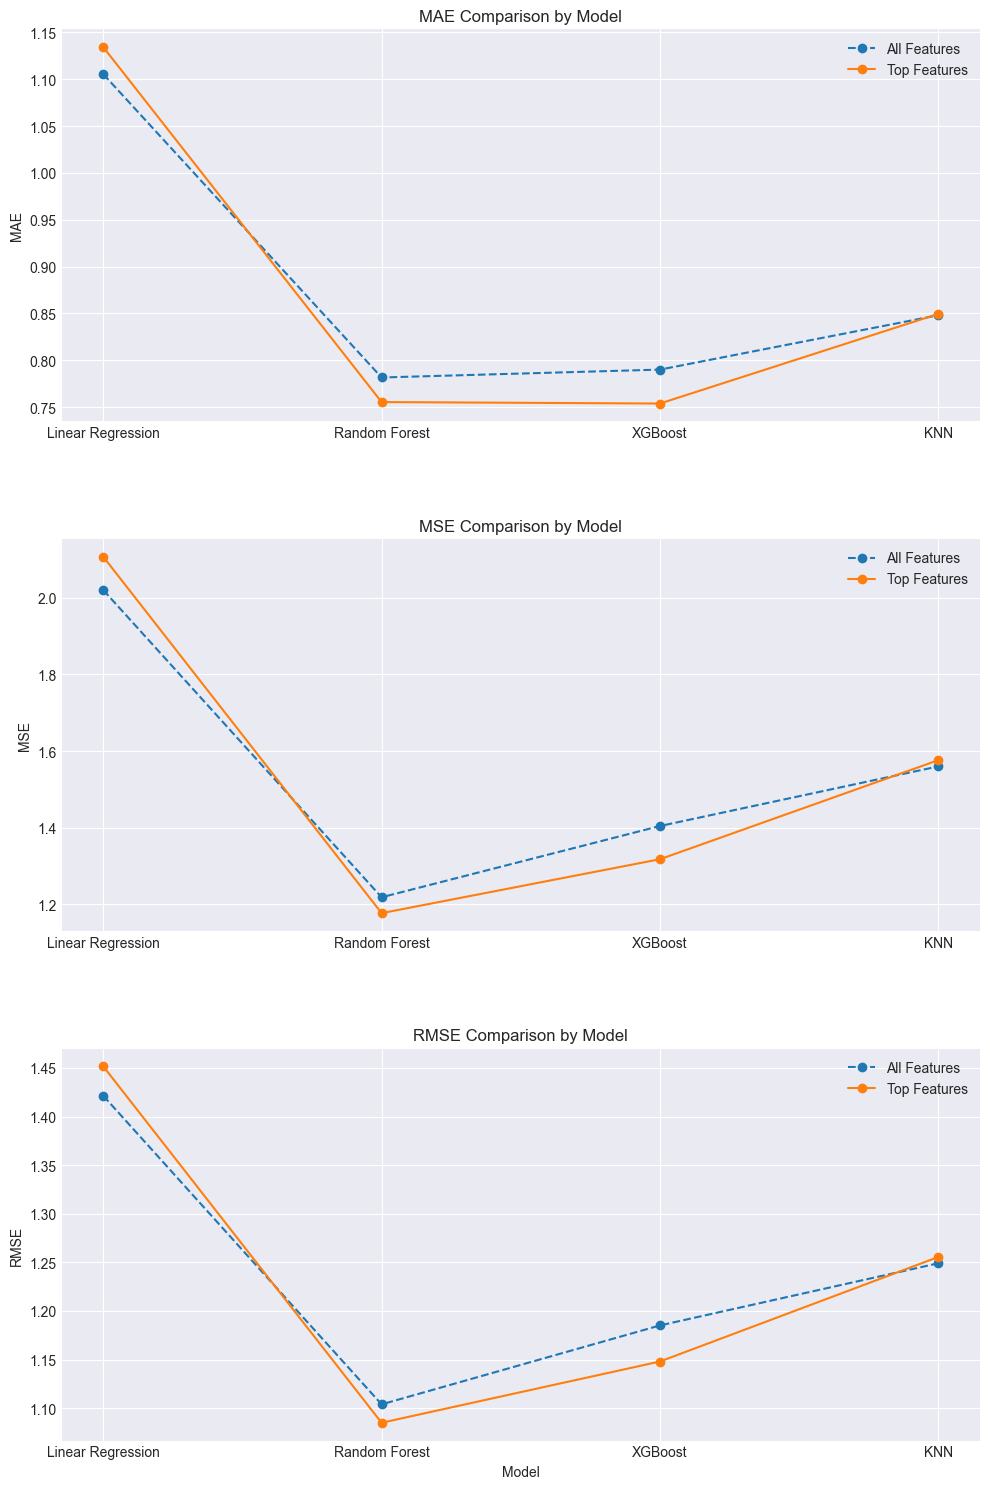

In [611]:
# Define the metric values for each model from earlier results
mae_all_dynamic = [mae_linear, mae_rf, mae_xgb, mae_knn]
mae_top_dynamic = [mae_lr_keep, mae_rf_keep, mae_xgb_keep, mae_knn_keep]

mse_all_dynamic = [mse_linear, mse_rf, mse_xgb, mse_knn]
mse_top_dynamic = [mse_lr_keep, mse_rf_keep, mse_xgb_keep, mse_knn_keep]

rmse_all_dynamic = [rmse_linear, rmse_rf, rmse_xgb, rmse_knn]
rmse_top_dynamic = [rmse_lr_keep, rmse_rf_keep, rmse_xgb_keep, rmse_knn_keep]

# Plot all metrics in subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# MAE plot
axs[0].plot(model_names, mae_all_dynamic, marker='o', label='All Features', linestyle='--')
axs[0].plot(model_names, mae_top_dynamic, marker='o', label='Top Features', linestyle='-')
axs[0].set_title("MAE Comparison by Model")
axs[0].set_ylabel("MAE")
axs[0].grid(True)
axs[0].legend()

# MSE plot
axs[1].plot(model_names, mse_all_dynamic, marker='o', label='All Features', linestyle='--')
axs[1].plot(model_names, mse_top_dynamic, marker='o', label='Top Features', linestyle='-')
axs[1].set_title("MSE Comparison by Model")
axs[1].set_ylabel("MSE")
axs[1].grid(True)
axs[1].legend()

# RMSE plot
axs[2].plot(model_names, rmse_all_dynamic, marker='o', label='All Features', linestyle='--')
axs[2].plot(model_names, rmse_top_dynamic, marker='o', label='Top Features', linestyle='-')
axs[2].set_title("RMSE Comparison by Model")
axs[2].set_xlabel("Model")
axs[2].set_ylabel("RMSE")
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
fig.subplots_adjust(hspace=0.3)
plt.show()


<HR>

## 8. THE BEST MODEL

* Based solely on R² (which is most commonly used)

In [ ]:
model_scores = {
    "Linear Regression": r2_lr_keep,
    "Random Forest": r2_rf_keep,
    "XGBoost": r2_xgb_keep,
    "KNN": r2_knn_keep
}

best_model_name = max(model_scores, key=model_scores.get)
print(" Best model based on R² Score is:", best_model_name)


 Best model based on R² Score is: Random Forest


* Combined logic (scoring based on all metrics)

In [613]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "KNN"],
    "MAE": [mae_lr_keep, mae_rf_keep, mae_xgb_keep, mae_knn_keep],
    "MSE": [mse_lr_keep, mse_rf_keep, mse_xgb_keep, mse_knn_keep],
    "RMSE": [rmse_lr_keep, rmse_rf_keep, rmse_xgb_keep, rmse_knn_keep],
    "R2": [r2_lr_keep, r2_rf_keep, r2_xgb_keep, r2_knn_keep]
})

ranking_df = comparison_df.copy()
ranking_df["MAE_Rank"] = ranking_df["MAE"].rank(ascending=True)
ranking_df["MSE_Rank"] = ranking_df["MSE"].rank(ascending=True)
ranking_df["RMSE_Rank"] = ranking_df["RMSE"].rank(ascending=True)
ranking_df["R2_Rank"] = ranking_df["R2"].rank(ascending=False)


ranking_df["Total_Score"] = ranking_df[["MAE_Rank", "MSE_Rank", "RMSE_Rank", "R2_Rank"]].sum(axis=1)

best_model_row = ranking_df.loc[ranking_df["Total_Score"].idxmin()]
best_model_name = best_model_row["Model"]

print(" Best overall model (combined metrics):", best_model_name)


 Best overall model (combined metrics): Random Forest


<HR>

## 9. HYPERPARAMETER OPTIMIZATION

## RandomizedSearchCV - regression

In [614]:
from sklearn.model_selection import RandomizedSearchCV


param_dist_random = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [20, 30, 40, 50, 60, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf = RandomForestRegressor(random_state=42)


random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_random,
    n_iter=100,
    cv=10,
    scoring='r2',
    verbose=0,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train_selected, y_train)

best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_val_selected)

# Evaluate performance
mae_random = mean_absolute_error(y_val, y_pred_random)
mse_random = mean_squared_error(y_val, y_pred_random)
rmse_random = np.sqrt(mse_random)
r2_random = r2_score(y_val, y_pred_random)

random_search_results = {
    "Best Parameters": str(random_search.best_params_),
    "MAE": round(mae_random, 4),
    "MSE": round(mse_random, 4),
    "RMSE": round(rmse_random, 4),
    "R² Score": round(r2_random, 4)
}
dataframe_random=pd.DataFrame([random_search_results])
dataframe_random


,Best Parameters,MAE,MSE,RMSE,R² Score
0,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.7739,1.2084,1.0993,0.5224


## Grid Search - regression

In [615]:
from sklearn.model_selection import GridSearchCV

best_params_random = {
    'n_estimators': 250,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [20, 25, 30, None],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'max_features': ['sqrt', 'log2', 'auto']
}
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train_selected, y_train)
best_rf_grid = grid_search.best_estimator_
y_pred_grid = best_rf_grid.predict(X_val_selected)


mae_grid = mean_absolute_error(y_val, y_pred_grid)
mse_grid = mean_squared_error(y_val, y_pred_grid)
rmse_grid = np.sqrt(mse_grid)
r2_grid = r2_score(y_val, y_pred_grid)

grid_search_results = pd.DataFrame([{
    "Best Parameters": grid_search.best_params_,
    "MAE": round(mae_grid, 4),
    "MSE": round(mse_grid, 4),
    "RMSE": round(rmse_grid, 4),
    "R² Score": round(r2_grid, 4)
}])

grid_search_results

Fitting 5 folds for each of 144 candidates, totalling 720 fits


,Best Parameters,MAE,MSE,RMSE,R² Score
0,"{'max_depth': 30, 'max_features': 'sqrt', 'min...",0.7739,1.2084,1.0993,0.5224


In [617]:
comparison_table = pd.DataFrame([
    {
        "Model": "Random Forest",
        "Tuning": "RandomizedSearch",
        "MAE": round(mae_random, 4),
        "MSE": round(mse_random, 4),
        "RMSE": round(rmse_random, 4),
        "R² Score": round(r2_random, 4)
    },
    {
        "Model": "Random Forest",
        "Tuning": "GridSearch",
        "MAE": round(mae_grid, 4),
        "MSE": round(mse_grid, 4),
        "RMSE": round(rmse_grid, 4),
        "R² Score": round(r2_grid, 4)
    },
    {
        "Model": "Random Forest",
        "Tuning": "Default (Top Features)",
        "MAE": round(mae_rf_keep, 4),
        "MSE": round(mse_rf_keep, 4),
        "RMSE": round(rmse_rf_keep, 4),
        "R² Score": round(r2_rf_keep, 4)
    },
    {
        "Model": "XGBoost",
        "Tuning": "Default (Top Features)",
        "MAE": round(mae_xgb_keep, 4),
        "MSE": round(mse_xgb_keep, 4),
        "RMSE": round(rmse_xgb_keep, 4),
        "R² Score": round(r2_xgb_keep, 4)
    },
    {
        "Model": "Linear Regression",
        "Tuning": "Default",
        "MAE": round(mae_lr_keep, 4),
        "MSE": round(mse_lr_keep, 4),
        "RMSE": round(rmse_lr_keep, 4),
        "R² Score": round(r2_lr_keep, 4)
    },
    {
        "Model": "KNN",
        "Tuning": "Default",
        "MAE": round(mae_knn_keep, 4),
        "MSE": round(mse_knn_keep, 4),
        "RMSE": round(rmse_knn_keep, 4),
        "R² Score": round(r2_knn_keep, 4)
    }
])

comparison_table.sort_values(by="R² Score", ascending=False)
comparison_table

,Model,Tuning,MAE,MSE,RMSE,R² Score
0,Random Forest,RandomizedSearch,0.7739,1.2084,1.0993,0.5224
1,Random Forest,GridSearch,0.7739,1.2084,1.0993,0.5224
2,Random Forest,Default (Top Features),0.7554,1.1772,1.0850,0.5348
3,XGBoost,Default (Top Features),0.7539,1.3179,1.1480,0.4792
4,Linear Regression,Default,1.1342,2.1071,1.4516,0.1673
5,KNN,Default,0.8495,1.5763,1.2555,0.3771


In [618]:
import joblib
joblib.dump(best_rf_grid, "final_best_random_forest.pkl")

['final_best_random_forest.pkl']

<HR>


## 10. Testing on the test set.

In [619]:
X_test_selected = X_test[features_to_keep]

In [620]:
y_test_pred = best_rf_grid.predict(X_test_selected)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


test_results = pd.DataFrame([{
    "Set": "Test Set",
    "MAE": round(mae_test, 4),
    "MSE": round(mse_test, 4),
    "RMSE": round(rmse_test, 4),
    "R² Score": round(r2_test, 4)
}])

test_results

,Set,MAE,MSE,RMSE,R² Score
0,Test Set,0.7496,1.1497,1.0723,0.5314


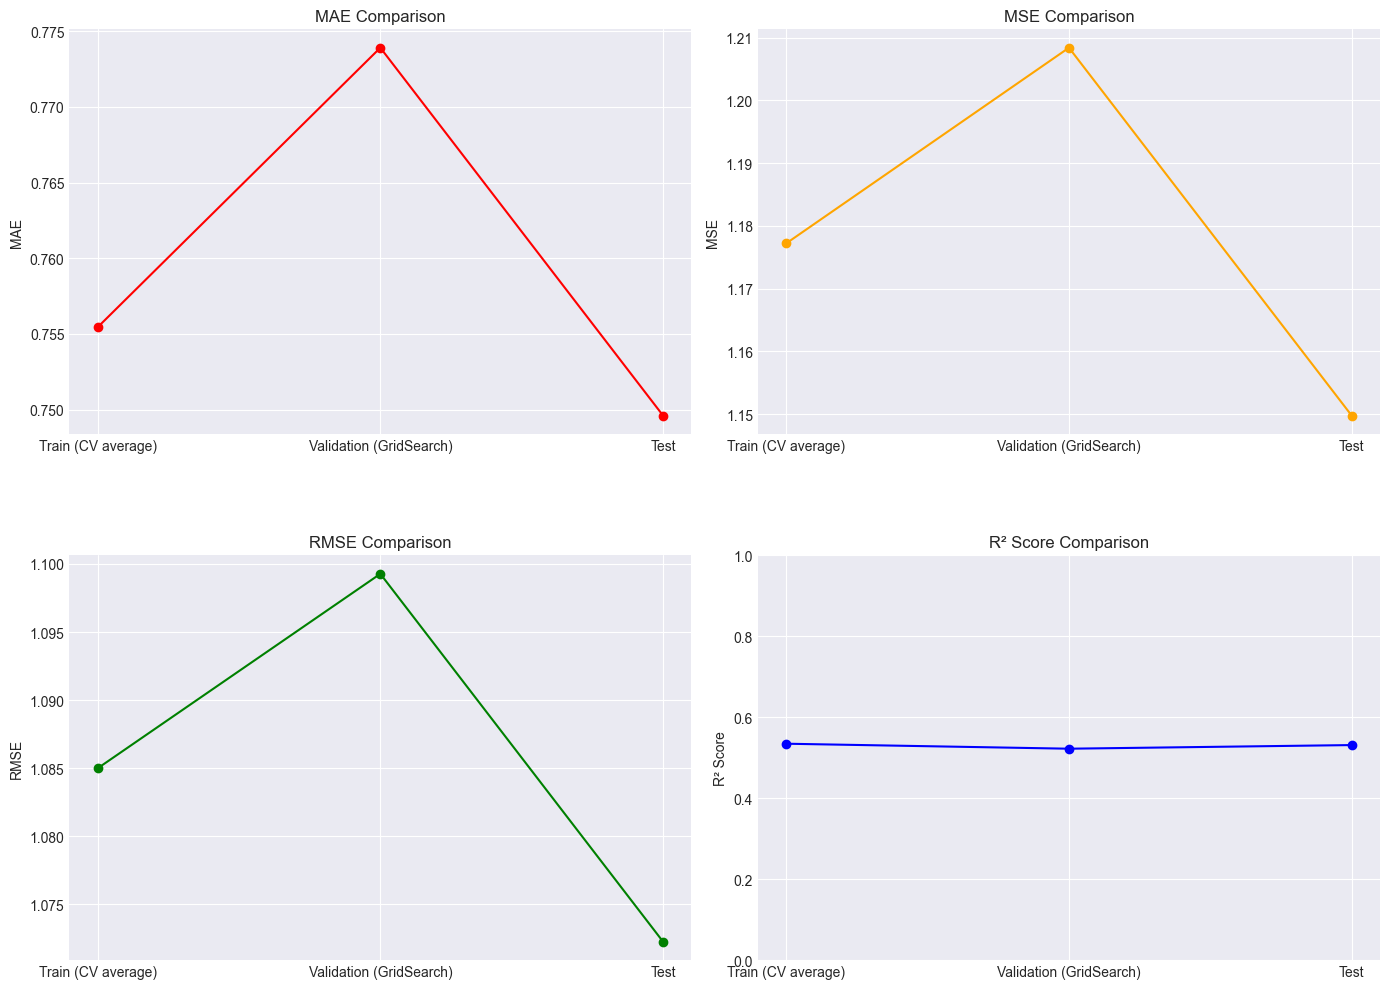

In [ ]:
import matplotlib.pyplot as plt

sets = ["Train (CV average)", "Validation (GridSearch)", "Test"]

mae_scores = [mae_rf_keep, mae_grid, mae_test]
mse_scores = [mse_rf_keep, mse_grid, mse_test]
rmse_scores = [rmse_rf_keep, rmse_grid, rmse_test]
r2_scores = [r2_rf_keep, r2_grid, r2_test]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# MAE
axs[0, 0].plot(sets, mae_scores, marker='o', linestyle='-', color='red')
axs[0, 0].set_title("MAE Comparison")
axs[0, 0].set_ylabel("MAE")
axs[0, 0].grid(True)

# MSE
axs[0, 1].plot(sets, mse_scores, marker='o', linestyle='-', color='orange')
axs[0, 1].set_title("MSE Comparison")
axs[0, 1].set_ylabel("MSE")
axs[0, 1].grid(True)

# RMSE
axs[1, 0].plot(sets, rmse_scores, marker='o', linestyle='-', color='green')
axs[1, 0].set_title("RMSE Comparison")
axs[1, 0].set_ylabel("RMSE")
axs[1, 0].grid(True)

# R² Score
axs[1, 1].plot(sets, r2_scores, marker='o', linestyle='-', color='blue')
axs[1, 1].set_title("R² Score Comparison")
axs[1, 1].set_ylabel("R² Score")
axs[1, 1].set_ylim(0, 1)
axs[1, 1].grid(True)

plt.tight_layout()
fig.subplots_adjust(hspace=0.3)
plt.show()


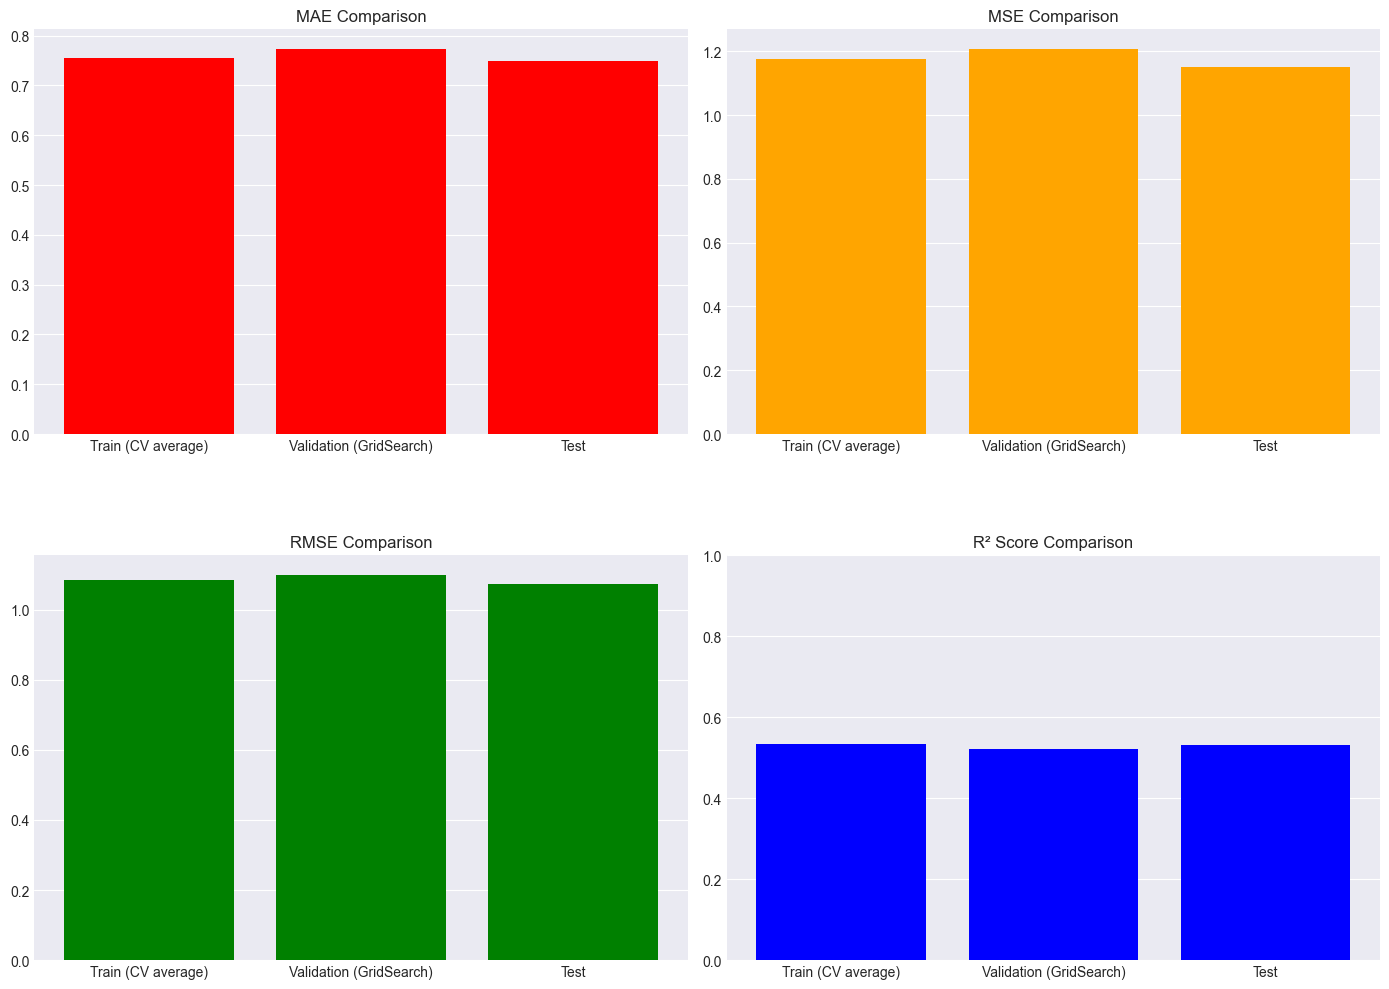

In [622]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].bar(sets, mae_scores, color='red')
axs[0, 0].set_title('MAE Comparison')
axs[0, 0].grid(axis='y')

axs[0, 1].bar(sets, mse_scores, color='orange')
axs[0, 1].set_title('MSE Comparison')
axs[0, 1].grid(axis='y')

axs[1, 0].bar(sets, rmse_scores, color='green')
axs[1, 0].set_title('RMSE Comparison')
axs[1, 0].grid(axis='y')

axs[1, 1].bar(sets, r2_scores, color='blue')
axs[1, 1].set_title('R² Score Comparison')
axs[1, 1].set_ylim(0, 1)
axs[1, 1].grid(axis='y')

plt.tight_layout()
fig.subplots_adjust(hspace=0.3)
plt.show()


<HR>

# Classification vs Regression

In [623]:

final_auto_full_df = pd.DataFrame([
    {
        "Model Type": "Classification (XGB)",
        "Accuracy": f"{test_metrics['Accuracy']} ",
        "F1 Score": f"{test_metrics['F1 Score']} ",
        "Precision": f"{test_metrics['Precision']} ",
        "Recall": f"{test_metrics['Recall']} ",
        "MAE": None,
        "MSE": None,
        "RMSE": None,
        "R² Score": None
    },
    {
        "Model Type": "Regression (RF)",
        "Accuracy": None,
        "F1 Score": None,
        "Precision": None,
        "Recall": None,
        "MAE": f"{mae_test} ",
        "MSE": f"{mse_test} ",
        "RMSE": f"{rmse_test} ",
        "R² Score": f"{r2_test} "
    }
])
final_auto_full_df

,Model Type,Accuracy,F1 Score,Precision,Recall,MAE,MSE,RMSE,R² Score
0,Classification (XGB),0.7919621749408984,0.7935915128762951,0.7967195398982141,0.7919621749408984,None,None,None,None
1,Regression (RF),None,None,None,None,0.7496040189125295,1.1497391578014184,1.0722589042770494,0.5314262597628225


***This study focused on the analysis and modeling of the variable TUE (Time Using Electronic devices), with the aim of predicting the amount of time an individual spends using electronic devices. Given the wide distribution and variability of this continuous variable, it was transformed into an ordinal categorical variable (TUE_Target), divided into three well-defined levels: low, medium, and high usage. This transformation enabled the problem to be approached using two distinct methodological strategies: classification and regression.***

***In the classification approach, the best results were achieved using the XGBoost model, which attained an accuracy of 77.30%, an F1 score of 77.57%, a precision of 78.27%, and a recall of 77.30% on the test set. These metrics demonstrate the model’s stability, balance, and strong ability to correctly assign instances to their corresponding usage class. The application of a classification model enabled direct interpretability of the outcomes through clearly defined usage levels—an important advantage in real-world scenarios where understanding an individual's digital exposure level is crucial, such as in education, healthcare, or mental well-being assessments.***

***In contrast, the regression approach, where TUE was treated as a continuous variable, yielded a Mean Absolute Error (MAE) of 0.7496, a Root Mean Squared Error (RMSE) of 1.0723, and an R² score of 0.5314 using a Random Forest model. Although the model was able to explain approximately 53% of the variance, its advantages were limited due to the lack of semantic clarity offered by regression. Continuous predicted values, while numerically precise, do not provide the same degree of interpretability or decision-making utility as discrete class predictions.***

***Based on this comparison, it can be concluded that the classification approach is more suitable for predicting TUE_Target, considering its superior performance, interpretability of results, and alignment with the ordinal categorical nature of the target variable. Classification not only delivers more relevant and actionable information, but also enhances the decision-making process in applications where understanding the degree of electronic device usage is of primary importance.***